# Исследовательский анализ рынка общественного питания города Москвы

- Автор: Онищенко Надежда
- Дата:

## Цели и задачи проекта

<font color='#777778'></font>

**Цель:**
   Провести исследовательский анализ рынка общественного питания города Москвы для выбора подходящего места будущего заведения и его категории.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить данные более детально;
    - изучить взаимосвязь данных.
4. Сформулировать выводы по проведённому анализу.
    

## Описание данных

<font color='#777778'></font>
Данные состоят из двух датасетов:

**`rest_info.csv`** — информацию о заведениях общественного питания Москвы;
**`rest_price.csv`** — информацию о среднем чеке в заведениях общественного питания Москвы.

Описание датасета `rest_info`

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки): 0 — заведение не является сетевым; 1 — заведение является сетевым.
- `seats` — количество посадочных мест.

Описание датасета `rest_price`

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»;
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена чашки капучино».

## Содержимое проекта

<font color='#777778'></font>
1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговый вывод и рекомендации.

---

---

### Загрузка данных и знакомство с ними

#### Загрузим библиотеки и датасеты `rest_info` и `rest_price`. 
Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `rest_info_df` и `rest_price_df`.

In [1]:
# Импортируем библиотеку pasndas
import pandas as pd

In [2]:
# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix 

In [4]:
# Выгружаем данные в переменные rest_info_df и rest_price_df
rest_info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

#### Познакомимся с данными и изучим общую информацию о них.

- Познакомимся с данными датасета `rest_info.csv`. 
Выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [5]:
# Выводим первые строки датафрейма на экран
rest_info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [6]:
# Выводим информацию о датафрейме
rest_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания города Москвы.
- Названия столбцов лаконичны, в одной размерности и отображают информацию соответствующую данным. 
- В данных дополнительно представлен столбец `id`. Тип данных `Object` соответствует содержанию. Данные в столбце являются ключом к данным датасета `rest_price.csv`
- Столбцы `name`, `category`, `address`, `district` и `hours` имеют тип данных `Object`, что соответствует их содержанию.
- Данные в столбце `hours`, в дальнейшем анализе потребуют преобразования в более удобный формат. 
- Все данные содержащие числовые значения хранятся в типах данных `int64` или `float64`. Это столбцы `rating`, `chain` и `seats`. Размерность данных столбца `chain` можно оптимизировать.
- Пропуски содержатся только в столбцах `hours` и `seats`.

- Познакомимся с данными датасета `rest_price.csv`.
Выведем первые строки методом head(), а информацию о датафрейме методом info():

In [7]:
# Выводим первые строки датафрейма на экран
rest_price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [8]:
# Выводим информацию о датафрейме
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания города Москвы.
- Назввания столбцов лаконичны, в одном виде типа snake case, и отображают информацию соответствующую данным. 
- В данных дополнительно представлен столбец `id`. Тип данных `Object` соответствует содержанию. Данные в столбце являются ключом к данным датасета `rest_info.csv`
- Столбцы `price`, и `avg_bill` имеют тип данных `Object`, что соответствует их содержанию. 
- Все данные содержащие числовые значения хранятся в типе данных `float64`. Это столбцы `middle_avg_bill` и `middle_coffee_cup`. 
- Пропуски содержатся во всех столбцах кроме `id`. Стоить отметить, что столбец `id` в датасете `rest_info.csv` имеет 8406 строк, в то время как в датасете `rest_price.csv` - 4058, что говорит о неполноте данных. 

**Промежуточный вывод:**

- Первичное знакомство с данными, показало их соотвествие описанию. Данные выглядят корректно. 
- Второй датасет предтавляет собой дополнительную информацию о части заведений общественного питания города Москвы.

#### Подготовка единого датафрейма


Каждая строка данных в датафреймах `rest_info.csv` и `rest_price.csv` — это информация о заведениях общественного питания Москвы, поэтому такие данные удобно соединить в один датафрейм, который можно использовать для поиска закономерностей. 

Соединять данные будем по столбцу `id`. 

Соединим данные, используя значение параметра `how`  — `'left'`. Это позволит сохранить все представленные заведения в данных.

In [9]:
# Соединяем данные в единый датафрейм df
df = rest_info_df.merge(rest_price_df, on='id', how='left')

In [10]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


- Данные соединены, и информация обо всех заведениях общественного питания сохранилась. Все данные из датафрейма `rest_price_df` также сохранились.

- Выведем переменную изначального количество строк датафрейма методом .shape (8406 строк)

In [11]:
# Посчитаем количество строк
zero_len_df = df.shape[0]
print(zero_len_df)

8406


---

### Предобработка данных

#### Изучим корректность типов данных и при необходимости проведем их преобразование

- Выведем типы данных в объединенном датафрейме df с помощью атрибута .dtypes

In [12]:
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int64
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

- Тип данных столбца `seats` преобразуем в целочисленный методом .astype(). 
- Оптимизируем челочисленный тип данных столбца `chain`, так как содержащаяся в нем информация представлена только числами 0 и 1. Для оптимизации будем использовать метод `pd.to_numeric` с аргументом `downcast='integer'`
- Все остальные типы данных соответвуют содержанию своих столбцов.  

In [13]:
# Преобразуем тип данных столбца `seats` к целочисленному
df['seats'] = df['seats'].astype('Int64')

In [14]:
# Оптимизируем целочисленный тип данных столбца `chain`
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')

In [15]:
# Проверим преобразованные типы данных в датафрейме df
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                   int8
seats                  Int64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

- Типы данных были успешно преобразованы и оптимизированы.

#### Изучим пропущенные значения в данных 

- Посчитаем количество пропусков в каждом столбце датафрейма и изучим данные с пропущенными значениями. Проведем обработку пропущенных значений.
- При первичном анализе были обнаружены пропуски в 6 столбцах `hours` и `seats`, `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup`. Узнаем абсолютное и относительное количество пропусков в датафрейме.

In [16]:
# Применяем метод isna() к датафрейму df
df.isna().sum().sort_values(ascending=False).reset_index().style.background_gradient(cmap='coolwarm', axis=0)

,index,0
0,middle_coffee_cup,7871
1,middle_avg_bill,5257
2,price,5091
3,avg_bill,4590
4,seats,3611
5,hours,536
6,id,0
7,name,0
8,category,0
9,address,0


In [17]:
# Подсчитываем долю строк с пропусками
(df.isna().sum()/df.shape[0]
).sort_values(ascending=False).reset_index().style.background_gradient(cmap='coolwarm', axis=0)

,index,0
0,middle_coffee_cup,0.936355
1,middle_avg_bill,0.625387
2,price,0.605639
3,avg_bill,0.546039
4,seats,0.429574
5,hours,0.063764
6,id,0.000000
7,name,0.000000
8,category,0.000000
9,address,0.000000


**Столбeц `hours`**
- 536 пропусков
- Столбец содержит информацию о днях и часах работы. Так как действующее заведение не может не иметь такой информации, предположительно это случайные пропуски или техническая ошибка. Тип пропусков MCAR. 
- Несмотря на то, что таких пропусков всего 6%, принято решение заменить их на "no data", во избежании потерь в других данных.

In [18]:
# Заменим пропуски в столбце `hours` методом .fillna()
df['hours'] = df['hours'].fillna('no data')

**Столбeц `seats`**
- 3611 пропусков
- Столбец содержит информацию о количестве посадочных мест. Скорее всего данная информация не первостепена и указывается только в случае, если указана самим заведением.  Тип пропусков MAR. 
- Таких пропусков 43%, принято решение оставить их без изменений, в случае необходимости в будущем анализе отфильтровывать.

**Столбeц `avg_bill`**
- 4590 пропусков
- Столбец содержит информацию о средней стоимости заказа в виде диапазона (Стоит отметить в данных может быть указан либо средний чек, либо цена чашки капучино, либо другой диапазон, что возможно приводит к потери части данных. Рекомендуется разделять такие данные на несколько столбцов.). Скорее всего данная информация не размещена заведением, хотя является весомым показателем при выборе. Тип пропусков MAR. 
- Таких пропусков 55%, принято решение заменить пропуски на "no data". 

In [19]:
# Заменим пропуски в столбце `avg_bill` методом .fillna()
df['avg_bill'] = df['avg_bill'].fillna('no data')

**Столбeц `price`**
- 5091 пропусков
- Столбец содержит информацию о категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее. При беглом осмотре, выявленно в основном наличие пропусков, в случае указания в столбце `avg_bill` не среднего счета. Тип пропусков MNAR. 
- Таких пропусков 61%, принято решение заменить пропуски на "no data". 

In [20]:
# Заменим пропуски в столбце `price` методом .fillna()
df['price'] = df['price'].fillna('no data')

**Столбeц `middle_avg_bill`**
- 5257 пропусков
- Столбец содержит число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт». Тип пропусков MNAR. 
- Таких пропусков 63%, принято решение заменить пропуски на '0', чтобы сохранить тип данных float64.

**!** *Для полноты понимания данных столбца, посчитаем количество строк с указанием «Средний счёт» в столбца `avg_bill`. Таким образом получаем только в 3143 из 8406 изначальных строк.*

In [21]:
counter=0
for i in df['avg_bill']:
    if 'Средний счёт' in i:
        counter+=1
print(counter) 

3149


In [22]:
# Заменим пропуски в столбце `middle_avg_bill` методом .fillna()
df['middle_avg_bill'] = df['middle_avg_bill'].fillna(0)

**Столбeц `middle_coffe_cup`**
- 7871 пропусков
- Столбец содержитчисло с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена чашки капучино» (Нельзя не отметить, что заведения чаще указывают «Средний счёт». Возможно имеется зависимость между категорией заведения и данным показателем). Тип пропусков MNAR. 
- Таких пропусков 94%, принято решение заменить пропуски на '0', чтобы сохранить тип данных float64. 

**!** *Для полноты понимания данных столбца, посчитаем количество строк с указанием "Цена чашки капучино" в столбца `avg_bill`. Таким образом получаем только в 534 из 8406 изначальных строк.*

In [23]:
counter=0
for i in df['avg_bill']:
    if 'Цена чашки капучино' in i:
        counter+=1
print(counter) 

535


In [24]:
# Заменим пропуски в столбце `middle_coffee_cup` методом .fillna()
df['middle_coffee_cup'] = df['middle_coffee_cup'].fillna(0)

**Подведем итоги по пропускам**
- Данные датасета `rest_info` имеют достачно полные сведения о заведениях общественного питания города Москвы, за исключением данных о количестве посадочных мест и времени работы. В ходе дальнейшего анализа изучим насколько данные являются необходимыми для решения поставленных задач и примем соответствующие решения.
- Данные датасета `rest_price` изначально не охватывают весь объем заведений датасета `rest_info` (только около 50%). Также высокие показатели пропусков связаны с отсутствием раздения данных столбца `avg_bill`, который непосредственно влияет на данные других столбцов. 
- Пропуски обработаны путем замены на подходящие значения.
- Итого в датасете имеем 8406 строк 

#### Проверим данные на явные и неявные дубликаты

- **Проализируем уникальные данные столбцов:**

In [25]:
# Выведем количество уникальных значений во всех столбцах
print(df.nunique())

id                   8406
name                 5614
category                8
address              5753
district                9
hours                1308
rating                 41
chain                   2
seats                 229
price                   5
avg_bill              898
middle_avg_bill       230
middle_coffee_cup      97
dtype: int64


- В столбце `id` все значения уникальные, таким образом исследователький анализ рынка Москвы состоит из 8406 заведений, явных дубликатов нет.
- В таких столбца как `name`, `address` проверим только на явные дубликаты, в виду их объема, предварительно нормализовав данные
- Столбцы `avg_bill`, `hours` только нормализуем и доработаем
- Столбец `chain` дубликатов не имеет, только 2 значения 0 и 1, что подвеждается выше.
- Столбцы `rating`, `seats`, `middle_avg_bill` и `middle_coffee_bill` - числовые.

1. Приведем данные столбцов `name`, `address` к верхнему регистру, `avg_bill`, `hours` к нижнему

In [26]:
df[['name', 'address']] = df[['name', 'address']].apply(lambda x: x.str.upper())
df[['hours', 'avg_bill']] = df[['hours', 'avg_bill']].apply(lambda x: x.str.lower())

2. В столбце `category` скрытых дубликатов не выявленно

In [27]:
# Выведем уникальные значения столбца `category`
print(df['category'].unique())

['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']


3. В столбце `district` скрытых дубликатов не выявленно

In [28]:
# Выведем уникальные значения столбца `district`
print(df['district'].unique())

['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ']


4. В столбце `price` скрытых дубликатов не выявленно

In [29]:
# Выведем уникальные значения столбца `price`
print(df['price'].unique())

['no data' 'выше среднего' 'средние' 'высокие' 'низкие']


5. Создадим новый столбец `avg_bill_name`, в который выделим вид средней стоимости заказа из столбца `avg_bill`, для поиска скрытых дубликатов

In [30]:
# Создадим столбец `avg_bill_name` с помощью функции create_hours

def create_bill(x):
    if x == 'Nan':
        return 'Nan'
    if x != 'Nan':
        return x[:x.find(':')]

df['avg_bill_name'] = df['avg_bill'].apply(create_bill)

6. В столбце `avg_bill_name`, соответственно в столбце `avg_bill` скрытых дубликатов не выявленно

In [31]:
# Выведем уникальные значения столбца `avg_bill_name`
print(df['avg_bill_name'].unique())

['no dat' 'средний счёт' 'цена чашки капучино' 'цена бокала пива']


**!** *При первичном ознакомлении со столбцом `hours` выявлены такие данные как работа заведения 'ежедневно, круглосуточно'.*
- Создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - значение `1` — если заведение работает ежедневно и круглосуточно;
  - значение `0` — в противоположном случае.

In [32]:
# Создадим столбец `is_24_7` с помощью функции create_hours

def create_hours(x):
    if x == 'ежедневно, круглосуточно':
        return 1
    return 0

df['is_24_7'] = df['hours'].apply(create_hours)

- **Проверим датафрейм на явные дубликаты**

In [33]:
duplicated = df.duplicated().sum()
print(duplicated)

0


- **Проверим наличие скрытых дубликатов** основываясь на основании столбцов `name`, `address`, `district`, `rating`

In [34]:
duplicated_rows = df.duplicated(subset=['name', 'address', 'district', 'rating']).sum()
print(duplicated_rows)

4


- **Удалим дубликаты**

In [35]:
df = df.drop_duplicates(subset=['name', 'address', 'district', 'rating'], keep='first', inplace=False) 

- **Посчитаем количество удалённых строк** в абсолютном и относительном значениях

In [36]:
# Количество удалённых строк в абсолютном значении
print(zero_len_df - len(df))

4


In [37]:
# Количество удалённых строк в относительном значении
print(round(1 - (len(df)/zero_len_df), 4))

0.0005


**Промежуточный вывод:**

В ходе проверки датасета `df`, после обработки пропусков, нормализации данных, поиска дубликатов, выявлено и удалено 4 строки датафрейма. 
Таким образом получаем сделующие данные:
- начальное количество строк датафрейма до: 8406
- количество строк после обработки пропусков и дубликатов: 8402

Удалено 0,05% 

- Выведем итоговую информацию о датафрейме

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8402 entries, 0 to 8405
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              8402 non-null   object 
 6   rating             8402 non-null   float64
 7   chain              8402 non-null   int8   
 8   seats              4792 non-null   Int64  
 9   price              8402 non-null   object 
 10  avg_bill           8402 non-null   object 
 11  middle_avg_bill    8402 non-null   float64
 12  middle_coffee_cup  8402 non-null   float64
 13  avg_bill_name      8402 non-null   object 
 14  is_24_7            8402 non-null   int64  
dtypes: Int64(1), float64(3), int64(1), int8(1), object(9)
memory usage: 1001.0+ K

---

### Исследовательский анализ данных

#### Исследуем количество объектов общественного питания по каждой категории.

- Изучим распределение данных по значениям столбца `category`. Посчитаем количество заведений по категориям методом `.value_counts()`.

In [39]:
# Посчитаем и выведем результат
print('Распределение данных по значениям столбца category:')

df['category'].value_counts().sort_values(ascending=False).reset_index().style.background_gradient(cmap='coolwarm', axis=0)

Распределение данных по значениям столбца category:


,category,count
0,кафе,2376
1,ресторан,2042
2,кофейня,1413
3,"бар,паб",764
4,пиццерия,633
5,быстрое питание,603
6,столовая,315
7,булочная,256


In [40]:
# Посчитаем в относительных значениях
df['category'].value_counts(normalize=True).reset_index().style.background_gradient(cmap='coolwarm', axis=0)

,category,proportion
0,кафе,0.282790
1,ресторан,0.243037
2,кофейня,0.168174
3,"бар,паб",0.090931
4,пиццерия,0.075339
5,быстрое питание,0.071769
6,столовая,0.037491
7,булочная,0.030469


- Для визуального анализа такого распределения используем линейчатаю диаграмму. Визуализируем распределение в столбце `category`:

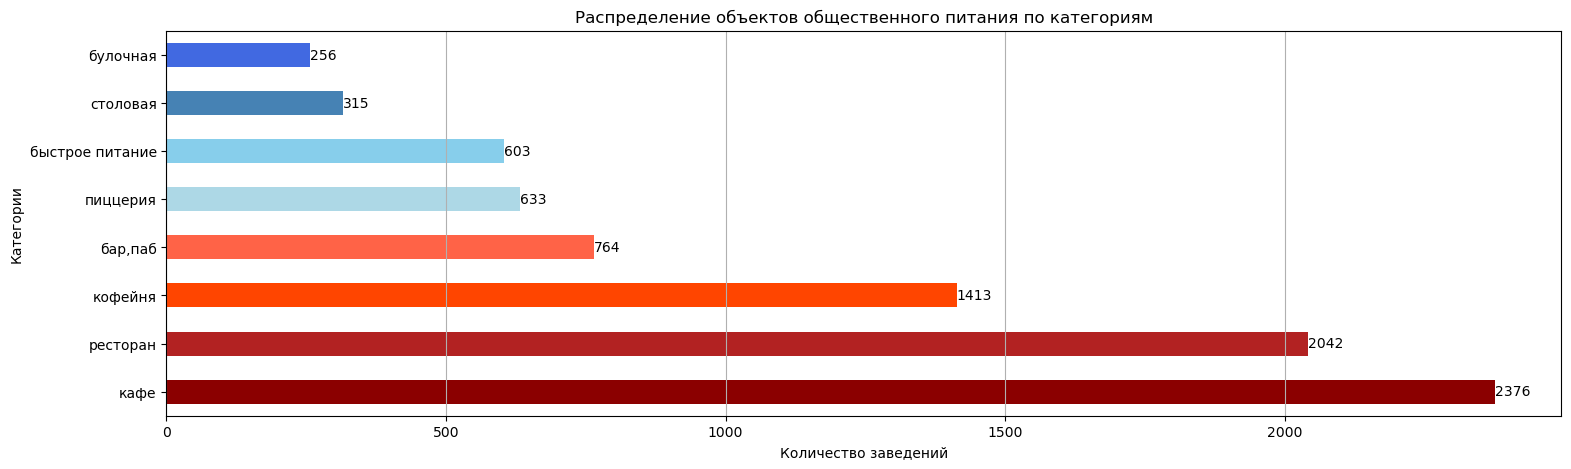

In [41]:
# Создаем переменную данных
df_cat_count = df['category'].value_counts()

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(18, 5))

# Список цветов
colors = ['darkred', 'firebrick', 'orangered', 'tomato', 'lightblue', 'skyblue', 'steelblue', 'royalblue']

# Строим линейчатаю диаграмму с помощью pandas через plot(kind='barh')
df_cat_count.plot(
               kind='barh',  # Тип графика - линейчатая диаграмма
               rot=0,  # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               color=colors[:len(df_cat_count)],
               title=f'Распределение объектов общественного питания по категориям'
)

# Добавляем значения на график
for index, value in enumerate(df_cat_count):
    plt.text(value, index, str(value), va='center')
    
# Настраиваем оформление графика
plt.xlabel('Количество заведений')
plt.ylabel('Категории')

# Добавляем сетку графика
plt.grid(axis='x')

# Выводим график
plt.show()

**По результатам исследования можно сказать следующее:**

- В данных представлены 8 уникальных значений категорий заведений. 
- Лидируют по количеству заведений "кафе" и «рестораны» 2376 и 2042 соответственно. 
- Меньше всего "булочных" и "столовых", 256 и 315. 
- Скорее всего такое распределение может быть связано с охватом аудитории (начеленность на определенную часть), предпочтенениями потребителей, сложножностями ограцизации, ценовыми аспектами.
- Предварительно можно сказать, исходя из принципа "спрос-предложение", в городе Москва наиболее привлекательными заведениями для потребителей являются такие категории как "кафе", "рестораны" и "кофейни".

#### Исследуем распределение количества заведений по административным районам города Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе города Москвы.

1. Изучим распределение данных по значениям столбца `district`. Посчитаем количество заведений по районам города методом `.value_counts()`.

In [42]:
# Посчитаем и выведем результат
print('Распределение данных по значениям столбца category:')

df['district'].value_counts().reset_index().style.background_gradient(cmap='coolwarm', axis=0)

Распределение данных по значениям столбца category:


,district,count
0,Центральный административный округ,2242
1,Северный административный округ,898
2,Южный административный округ,892
3,Северо-Восточный административный округ,890
4,Западный административный округ,850
5,Восточный административный округ,798
6,Юго-Восточный административный округ,714
7,Юго-Западный административный округ,709
8,Северо-Западный административный округ,409


In [43]:
# Посчитаем в относительных значениях
df['district'].value_counts(normalize=True).reset_index().style.background_gradient(cmap='coolwarm', axis=0)

,district,proportion
0,Центральный административный округ,0.266841
1,Северный административный округ,0.106879
2,Южный административный округ,0.106165
3,Северо-Восточный административный округ,0.105927
4,Западный административный округ,0.101166
5,Восточный административный округ,0.094977
6,Юго-Восточный административный округ,0.084980
7,Юго-Западный административный округ,0.084385
8,Северо-Западный административный округ,0.048679


- Для визуального анализа такого распределения используем линейчатаю диаграмму. Визуализируем распределение в столбце `district`, предварительно преобразовав данные столбца:

In [44]:
# Сократим наименование района с помощью метода .replace()
df['district'] = df['district'].str.replace('административный округ', 'ао')

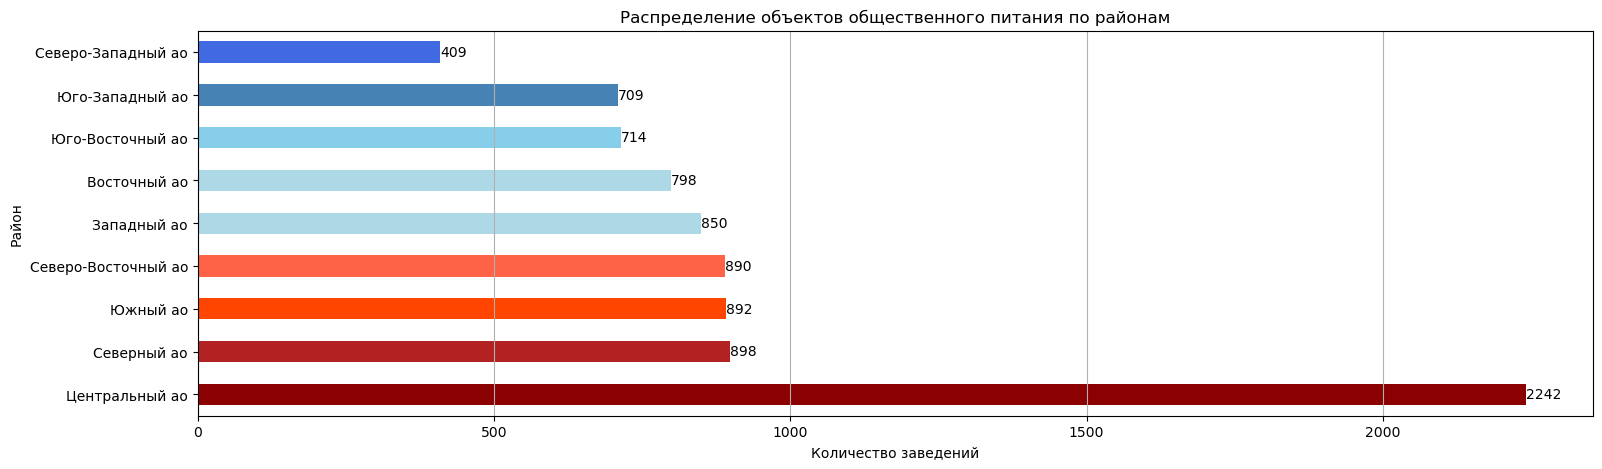

In [45]:
# Создаем переменную данных
df_dis_count = df['district'].value_counts()

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(18, 5))

# Список цветов
colors = ['darkred', 'firebrick', 'orangered', 'tomato', 'lightblue', 'lightblue', 'skyblue', 'steelblue', 'royalblue', 'blue']

# Строим линейчатаю диаграмму с помощью pandas через plot(kind='barh')
df_dis_count.plot(
               kind='barh', # Тип графика - линейчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               color=colors[:len(df_dis_count)],
               title=f'Распределение объектов общественного питания по районам'
)

# Добавляем значения на график
for index, value in enumerate(df_dis_count):
    plt.text(value, index, str(value), va='center')
    
# Настраиваем оформление графика
plt.xlabel('Количество заведений')
plt.ylabel('Район')

# Добавляем сетку графика
plt.grid(axis='x')

# Выводим график
plt.show()

**По результатам исследования можно сказать следующее:**

- В данных представлены 9 уникальных значений районов города. 
- По результам видно калосальное преобладание количества заведений общественного питания в Центральном AO - 2242, что является логичным для центра столицы (туристы, офисы). 
- Меньше всего в Северо-Западном AO - 409 (стоить уточнить что распологается в данном районе, что понижает его привлекательность для организаторов общественного питания. Возможные варианты это промзона, неблагополучная экология или сама площадь не позволяет развиться большему количеству заведений)
- По итогу можно сказать, что хотя Центральный АО города Москвы является наиболее популярным у организаторов общественного питания и без сомнения у потребителя, стоит учитывать, что и конкуренция в данном районе будет соответственно самой высокой.

2. Изучим распределение данных в Центральном административном округе Москвы по категориям заведений общественного питания

- Отфильтруем данные столбца `disctrict` и посчитаем количество заведений в Центральном АО

In [46]:
# Отфильтровываем и считаем количество заведений
df[df['district']=='Центральный ао']['category'].value_counts().sort_values(
    ascending=False).reset_index().style.background_gradient(cmap='coolwarm', axis=0)

,category,count
0,ресторан,670
1,кафе,464
2,кофейня,428
3,"бар,паб",364
4,пиццерия,113
5,быстрое питание,87
6,столовая,66
7,булочная,50


In [47]:
# Посчитаем в относительных значениях
df[df['district']=='Центральный ао']['category'].value_counts(normalize=True).sort_values(
    ascending=False).reset_index().style.background_gradient(cmap='coolwarm', axis=0)

,category,proportion
0,ресторан,0.298840
1,кафе,0.206958
2,кофейня,0.190901
3,"бар,паб",0.162355
4,пиццерия,0.050401
5,быстрое питание,0.038805
6,столовая,0.029438
7,булочная,0.022302


- Для визуального анализа такого распределения используем столбчатую диаграмму. Визуализируем распределение в столбце `district` по Центральному AO:

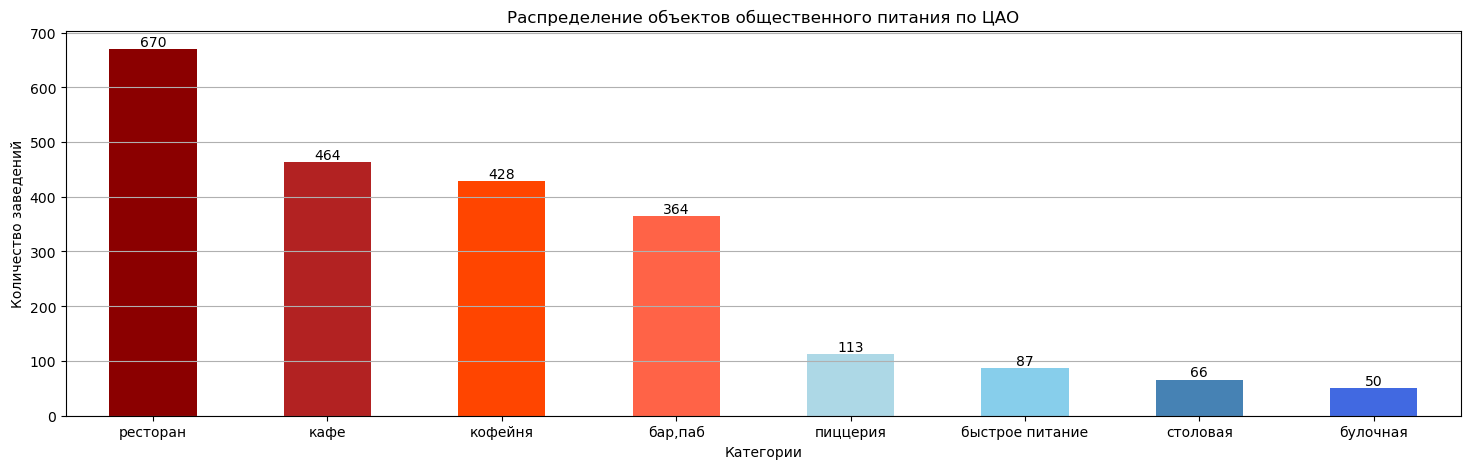

In [48]:
# Создаем переменную данных
df_dis_cat = df[df['district']=='Центральный ао']['category'].value_counts()

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(18, 5))

# Список цветов
colors = ['darkred', 'firebrick', 'orangered', 'tomato', 'lightblue', 'skyblue', 'steelblue', 'royalblue']

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_dis_cat.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               color=colors[:len(df_dis_cat)],
               title=f'Распределение объектов общественного питания по ЦАО'
)

# Добавляем значения на график
for index, value in enumerate(df_dis_cat):
    plt.text(index, value, str(value), ha='center', va='bottom')
    
# Настраиваем оформление графика
plt.xlabel('Категории')
plt.ylabel('Количество заведений')

# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

**По результатам исследования можно сказать следующее:**

- В Центральном административном округе присутствуют все 8 категорий общественного питания. 
- Значительно преобладают "рестораны" - 670 (более высокое ценообразование, аренда площадей и потребнебности потребителей в центре способствуют развитию ресторанов), меньше всего заведений таких как "столовая" и "булочная", 66 и 50 соответственно (Для столовых нужны большие помешения, что в центре города крайне затратно, плюс необходим более подходящий контингент потребителя. Булочные скорее всего лучше развиваются в спальных районах, рядос учебными заведениями).

#### Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Изучим какие категории заведений чаще являются сетевыми.

- Изучим распределение данных по значениям столбца `chain`. Посчитаем количество заведений в разрезе сетевые/несетевые заведения методом `.value_counts()` (где 1 - сетевой, 0 - несетевой).

In [49]:
# Посчитаем и выведем результат
print('Распределение данных по значениям столбца chain:')

print(df['chain'].value_counts())

Распределение данных по значениям столбца chain:
chain
0    5199
1    3203
Name: count, dtype: int64


In [50]:
# Посчитаем в относительных значениях
print(df['chain'].value_counts(normalize=True))

chain
0    0.618781
1    0.381219
Name: proportion, dtype: float64


**!** *В результате получается 3203 сетевых заведения и 5199 несетевых.*

- Для визуального анализа такого распределения используем столбчатую диаграмму. Визуализируем распределение в столбце `chain`:

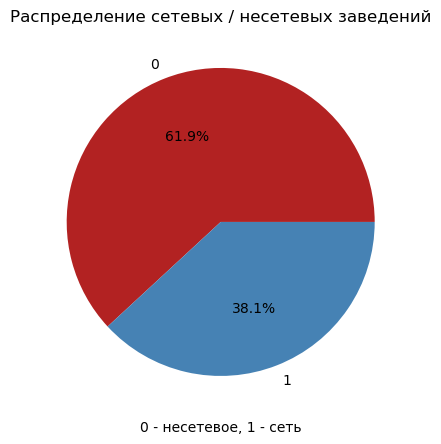

In [51]:
# Создаем переменную данных
df_chain = df['chain'].value_counts(normalize=True)

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(18, 5))

# Список цветов
colors = ['firebrick', 'steelblue']

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
axes = df_chain.plot( # переведем в проценты
               kind='pie', # Тип графика - столбчатая диаграмма
               autopct = '%1.1f%%',
               legend=False, # Выключаем легенду
               colors=colors[:len(df_chain)],
               title=f'Распределение сетевых / несетевых заведений'
)

# Настраиваем оформление графика
plt.xlabel('0 - несетевое, 1 - сеть')
plt.ylabel('')
# Поворот графика
axes.set_aspect('equal')

# Выводим график
plt.show()

**По результатам исследования можно сказать следующее:**

- В результате видим преобладание несетевых заведений общественного питания примерно 60/40. 
- Стоит отметить что несмотря на разрыв 20%, в общем количество сетевых заведений очень высокое, как это связано с категорией заведения рассмотрим далее.

#### Изучим распределение данных по значениям столбца `chain` в разрезе категорий заведений

- Сгруппируем данные по значениям столбца `category` методом `.groupby()` и посчитаем количество заведений в разрезе категорий и параметра `chain` методом `.value_counts()`

In [52]:
# Сгрупируем данные, посчитаем и выведем результат
pivot_cat_ch = df.pivot_table(index='category', columns='chain', values='name', aggfunc='count')
display(pivot_cat_ch)

chain,0,1
category,,
"бар,паб",596,168
булочная,99,157
быстрое питание,371,232
кафе,1597,779
кофейня,693,720
пиццерия,303,330
ресторан,1313,729
столовая,227,88


- Для визуального анализа такого распределения используем столбчатую диаграмму. Визуализируем распределение в столбце chain по категориям заведений столбца `category`:

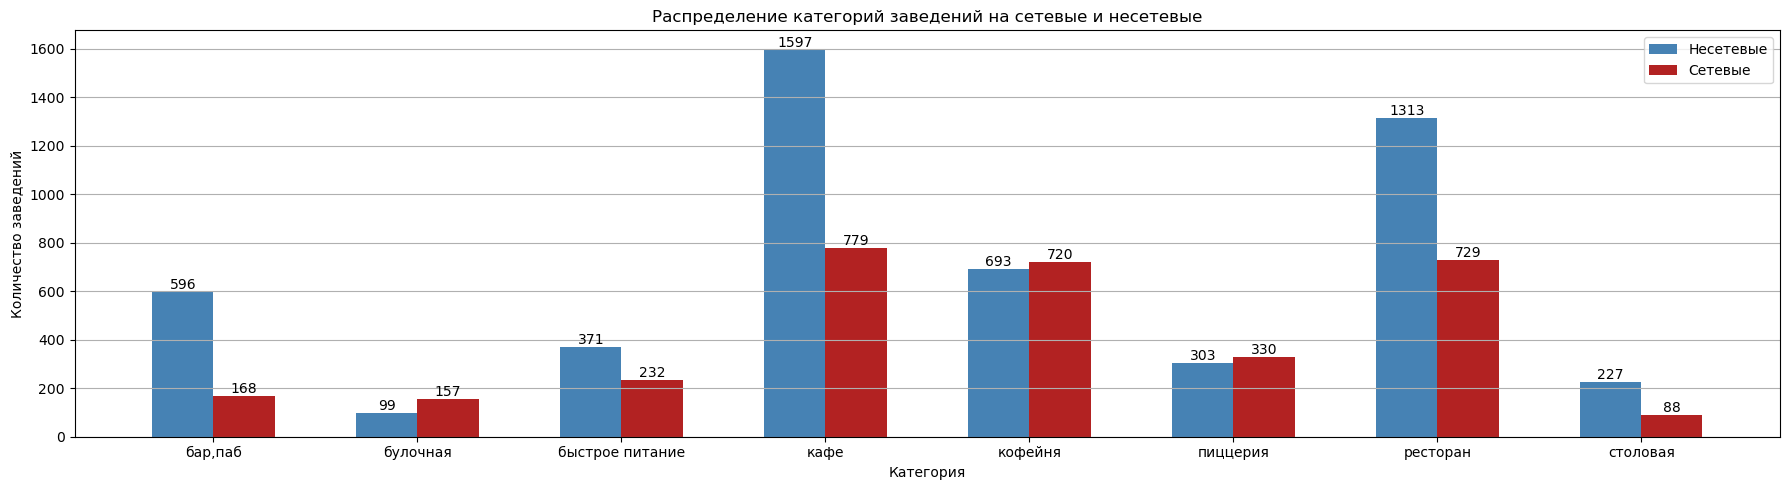

In [53]:
# Параметры графика
width = 0.3
category = list(pivot_cat_ch.index)
x = range(len(category))

# Создаем график
fig, ax = plt.subplots(figsize=(18, 5))

bar1 = ax.bar([i - width/2 for i in x], pivot_cat_ch[0], width, label='Несетевые', color='steelblue') # Создаем столбцы
bar2 = ax.bar([i + width/2 for i in x], pivot_cat_ch[1], width, label='Сетевые', color='firebrick')

ax.set_title('Распределение категорий заведений на сетевые и несетевые')
ax.set_ylabel('Количество заведений')
ax.set_xlabel('Категория')
ax.set_xticks(x)
ax.set_xticklabels(category, rotation=0)
ax.legend()

# Добавляем значения на график
for bar in bar1:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
        str(bar.get_height()), ha='center', va='bottom')
for bar in bar2:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
        str(bar.get_height()), ha='center', va='bottom')

# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.tight_layout() # Настроим отступы
plt.show()

**По результатам исследования можно сказать следующее:**

- В заведениях типа **"бары"**, **"пабы"**, **"кафе"** и **"рестораны"** преобладают **несетевые** форматы.
  
В Москве значительная часть заведений этого типа — независимые или семейные бизнесы, особенно в исторических районах и на прогулочных улицах. Они зачастую предлагают уникальные концепции и более высокое качество обслуживания, что оправдывает более высокий средний чек. Однако, на том же рынке преобладают и крупные сетевые марки — такие как McDonald's, KFC, Starbucks — что подтверждает нелинейность распределения. Высокая конкуренция и необходимость инвестировать в поддержку уровня обслуживания делают содержание сетевых заведений дорогостоящим, что способствует популярности несетевых форм.
- В заведениях типа **"пиццерии"**, **"булочные"** и **"кофейни"** больше **сетевых** форм, хотя разница с несетевыми невелика.
  
В Москве эти сегменты демонстрируют сильное доминирование сетевых франшиз (Pizza Hut, Domino's, Coffee Bean). Низкий порог входа, стандартизация качества и привлекательная модель франчайзинга способствуют быстрому расширению. Несмотря на это, в популярности остаются и независимые пиццерии или кофейни, особенно в нишах с уникальной концепцией или в более элитных районах. Тем не менее, массовый рынок диктует преобладание сетевых форматаов.
- Большие показатели **несетевых** форм в заведениях **"быстрого питания"**.

Рост популярности streetfood, фудтрейков и мелких независимых точек в Москве подтверждает увеличение доли несетевых форм в сегменте быстрого питания. Особенно это заметно в центре города, на уличных фестивалях и деловых районах, где длинные очереди и разнообразие предложений делают уникальный формат популярным и прибыльным.
- Преобладание **несетевых** форм в **"столовых"** скорее связано с непопулярностью этого формата, а также с особенностями его организации.
  
В Москве государственные и муниципальные столовые все еще существуют, однако снижается их популярность по сравнению с частными и сетевыми заведениями. Низкая рентабельность, высокие требования по санитарии, необходимость больших объемов продуктового снабжения и низкая маржа делают их менее привлекательными для сетевых сетей. В то же время, независимые столовые, расположенные в бизнес-центрах, учебных заведениях или рядом с жилыми районами, часто остаются в сегменте.

#### Исследуем количество посадочных мест в заведениях. 

1. Изучим распределение данных по значениям столбца `seats`. Основываясь на полученных ранее данных об уникальных значениях столбца `seats`, в количестве 229 шт, изучим статистические показатели столбца методом `.discribe()`.

In [54]:
# Изучаем статистические показатели, отфильтровав значение '0' как пустое значение, уберем значения с заглушкой и 
# выводим результат
print('Статистические показатели столбца seats:')

stat_seat = df[(df['seats']!=0) & (df['seats']!='Nan')]['seats'].describe()
print(stat_seat)

Статистические показатели столбца seats:
count        4656.0
mean     111.526632
std       123.19793
min             1.0
25%            40.0
50%            78.0
75%           141.0
max          1288.0
Name: seats, dtype: Float64


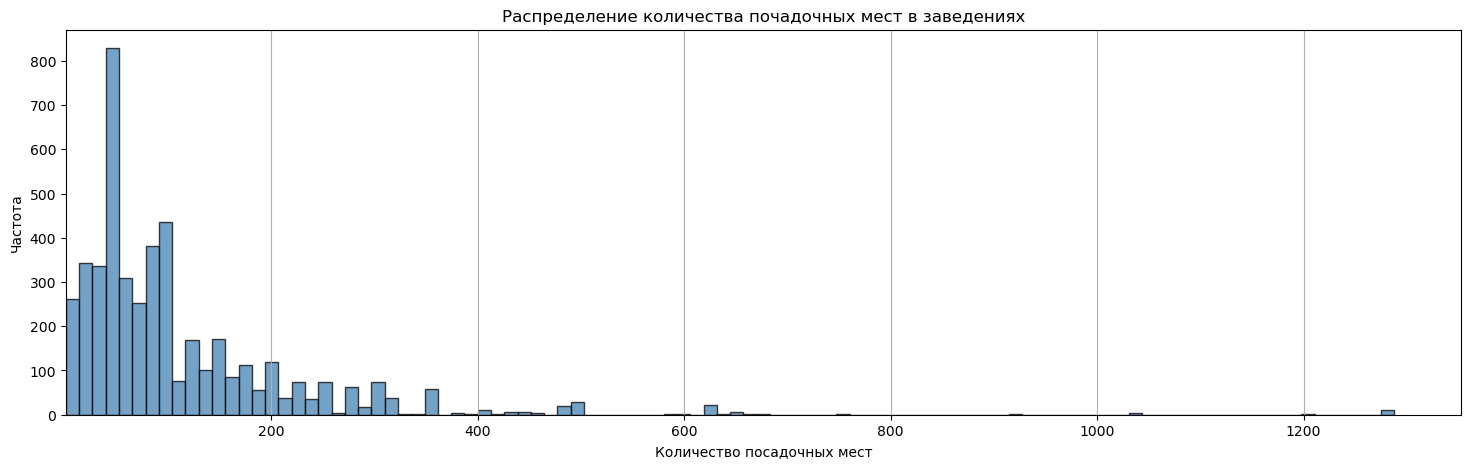

In [55]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(18, 5))

# Создаем переменную данных
df_seat = df[(df['seats']!=0) & (df['seats']!=-1)]['seats']

# Строим гистограмму с помощью pandas через plot(kind='hist')
ax = df_seat.plot(
                kind='hist', # Тип графика - гистограмма
                bins=100, # Устанавливаем количество корзин
                alpha=0.75,
                color='steelblue',
                edgecolor='black',
                range=(1, df_seat.max()),
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение количества почадочных мест в заведениях')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')

# Устанавливаем границы осей, чтобы начать с нуля
plt.xlim(left=1)  # Начало оси X с 0
plt.ylim(bottom=0)  # Начало оси Y с 0

# Добавляем сетку графика
plt.grid(axis='x')

# Выводим график
plt.show()

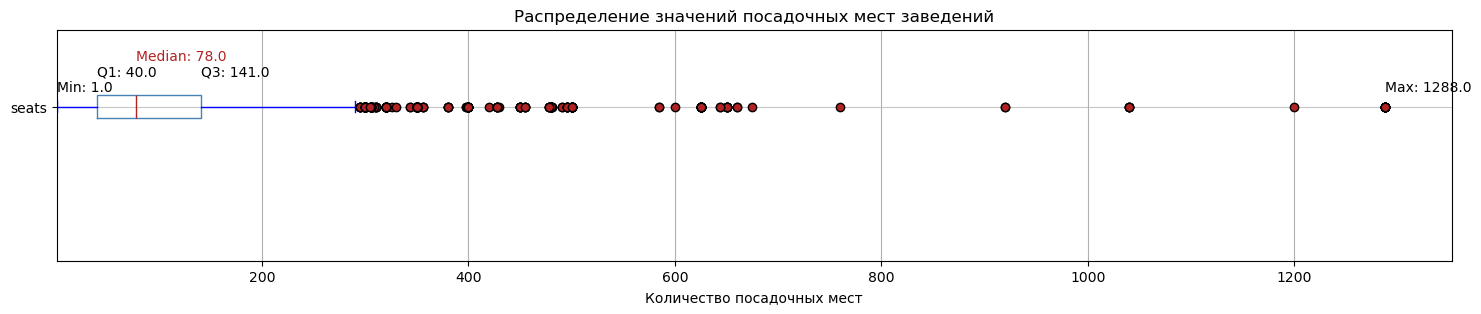

In [56]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(18, 3))

df_seats = df[(df['seats']!=0) & (df['seats']!=-1)]

# Строим диаграмму размаха значений в столбце score
df_seats.boxplot(column='seats',
                 vert=False,
                 boxprops=dict(color='steelblue'),  # Цвет ящика
                 whiskerprops=dict(color='blue'),  # Цвет усов
                 capprops=dict(color='blue'),  # Цвет концов усов
                 flierprops=dict(markerfacecolor='firebrick', marker='o'),  # Настройки для выбросов
                 medianprops=dict(color='firebrick'),  # Цвет медианы                 
)

# Добавляем заголовок и метки оси
plt.title('Распределение значений посадочных мест заведений')
plt.xlabel('Количество посадочных мест')

# Устанавливаем границы осей, чтобы начать с нуля
plt.xlim(left=1)  # Начало оси X с 0
plt.ylim(bottom=0)  # Начало оси Y с 0
   
# Выводим график
plt.grid(axis='y', alpha=0.7)

# Получаем данные о ящике и усах
median = stat_seat['50%']
q1 = stat_seat['25%']
q3 = stat_seat['75%']
min_val = stat_seat['min']
max_val = stat_seat['max']

# Добавляем текст значений ящика и усов
plt.text(min_val, 1.1, f'Min: {min_val}', color='black')
plt.text(q1, 1.2, f'Q1: {q1}', color='black')
plt.text(median, 1.3, f'Median: {median}', color='firebrick')
plt.text(q3, 1.2, f'Q3: {q3}', color='black')
plt.text(max_val, 1.1, f'Max: {max_val}', color='black')

plt.show()

**По результатам исследования можно сказать следующее:**

- Большой разброс значений и соответственно выбросов. (Хвост графика сильно вятянут справа.)
- Основной объем значений находится в диапазоне от 1 до 293 посадочных мест 
- Высокое стандартное отклонение (124) также говорит о вариативности данных
- Медиана 78 пм
- В общем, по имеющимся данным, можно сделать вывод о второстепенности указания заведением поcaдочных мест.

2. Изучим количество посадочных мест в зависимости от категории заведения

- Посчитаем среднее количество посадочных мест в зависимости от категории методом `.groupby()`, предварительно отфильтровав данные от выбросов:

In [57]:
# Вычисляем квартили Q1 и Q3
Q1 = stat_seat['25%']
Q3 = stat_seat['75%']

# Вычисляем межквартильный размах IQR
IQR = Q3 - Q1

# Определяем верхний порог для выбросов
upper_bound = Q3 + 1.5 * IQR # правого уса исходя из графика выше

# Определяем нижний порог для выбросов
lower_bound = 1 # Приправняем нижнюю границу к минимальному положительному числу

# Отфильтровываем данные
df_seats_new = df[(df['seats'] >= lower_bound) & (df['seats'] <= upper_bound)]

In [58]:
# Посчитаем и выведем результат
print('Распределение посадочных мест по категориям:')

group_seat_cat = df_seats_new.groupby('category')['seats'].mean().sort_values(ascending=False)
print(group_seat_cat)

Распределение посадочных мест по категориям:
category
ресторан           98.065801
бар,паб            89.184211
кофейня             88.18006
быстрое питание    85.877419
булочная           83.099237
столовая           81.173333
кафе               79.087703
пиццерия           78.777778
Name: seats, dtype: Float64


- Для визуального анализа такого распределения используем столбчатую диаграмму. Визуализируем распределение в таблице `pivot_seat_cat`:

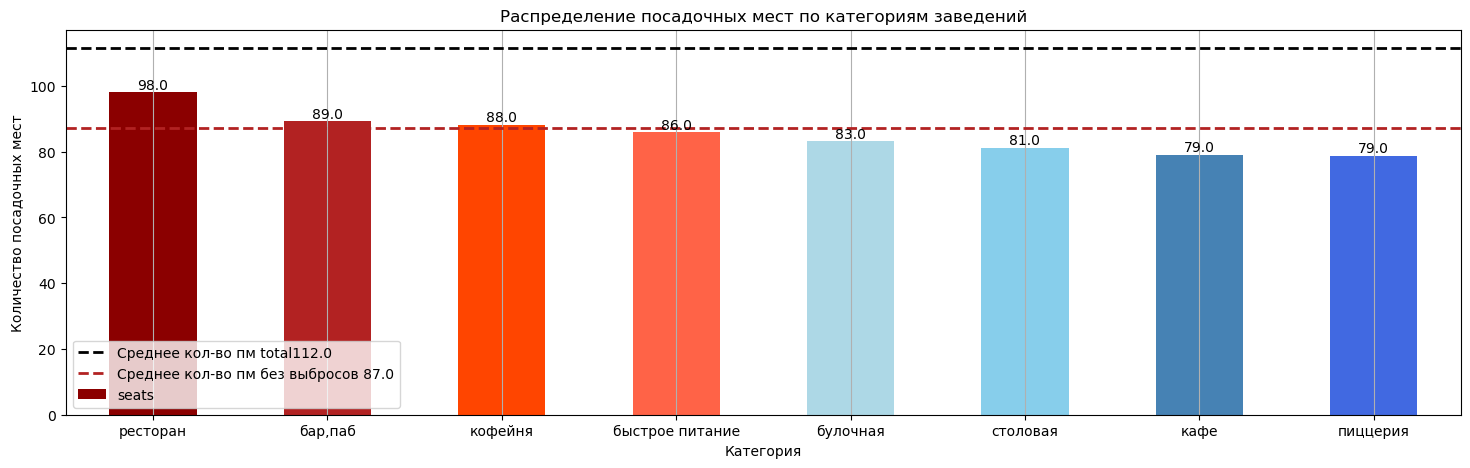

In [59]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(18, 5))

# Список цветов
colors = ['darkred', 'firebrick', 'orangered', 'tomato', 'lightblue', 'skyblue', 'steelblue', 'royalblue']

# Строим столбчатую диаграмму с помощью pandas через plot(kind='barh')
group_seat_cat.plot(
               kind='bar', # Тип графика - линейчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               color=colors[:len(group_seat_cat)],
               title=f'Распределение посадочных мест по категориям заведений'
)

# Добавляем значения на график
for index, value in enumerate(group_seat_cat):
    plt.text(index, value, str(round(value,0)), ha='center', va='bottom')
    
# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Количество посадочных мест')

mean_seat_1 = df[(df['seats']!=0) & (df['seats']!=-1)]['seats'].mean() # С учетом выбросов, но без нулевых данных
mean_seat_2 = df_seats_new['seats'].mean() # Без учета выбросов

# Наносим на график линию со средним значением количества посадочных мест по всем данным, но без нулевых данных 
plt.axhline(mean_seat_1, # Данные, по которым строится линия
            color='black', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=2, # Ширина линии
            label=f'Среднее кол-во пм total{round(mean_seat_1,0)}')

# Наносим на график линию со средним значением количества посадочных мест без выбросов
plt.axhline(mean_seat_2, # Данные, по которым строится линия
            color='firebrick', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=2, # Ширина линии
            label=f'Среднее кол-во пм без выбросов {round(mean_seat_2,0)}')

# Добавляем сетку графика и легенду
plt.grid(axis='x')
plt.legend(loc='lower left')

# Выводим график
plt.show()

**По результатам исследования можно сказать следующее:**

- Рестораны в среднем имеют наибольшее количество посадочных мест (около 98 п.м.), что возможно связано с наличием банкетных залов или просторных залов для мероприятий.

- Кафе и пиццерии имеют наименьшее среднее количество посадочных мест — примерно 79 п.м., что, скорее всего, обусловлено их меньшими габаритами и более компактным форматом.

- В остальных сегментах среднее число посадочных мест колеблется в диапазоне от 81 до 89 п.м.

- На графике видно, что среднее количество посадочных мест с учетом выбросов значительно превышает показатели без учета выбросов. Это может указывать на наличие аномальных данных или технических ошибок, которые необходимо дополнительно проанализировать и исправить.

#### Исследуем рейтинг заведений. 

1. Изучим рейтинги заведений. Данные имеют 41 уникальное значение. Изучим статистические показатели столбца `rating`.

- Основываясь на полученных ранее данных об уникальных значениях столбца `rating`, в количестве 41 шт, изучим статистические показатели столбца методом `.discribe()`.

In [60]:
# Изучаем статистические показатели и выводим результат 
print('Статистические показатели столбца rating:')

stat_rat = df['rating'].describe()
print(stat_rat)

Статистические показатели столбца rating:
count    8402.000000
mean        4.230017
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64


- Можно предположить, что данные рейтинга заведений имеют распределение, близкое к нормальному. Об этом говорит близость среднего и медианного значений. Однако значение стандартного отклонения довольно высокое — 0,47, и при среднем 4,2 это указывает, что возможны выбросы. Данные варьируются от 1 до 5.

- Дополнительно проверим это и построим гистограмму распределения значений и диаграмму размаха для столбца с рейтингом.

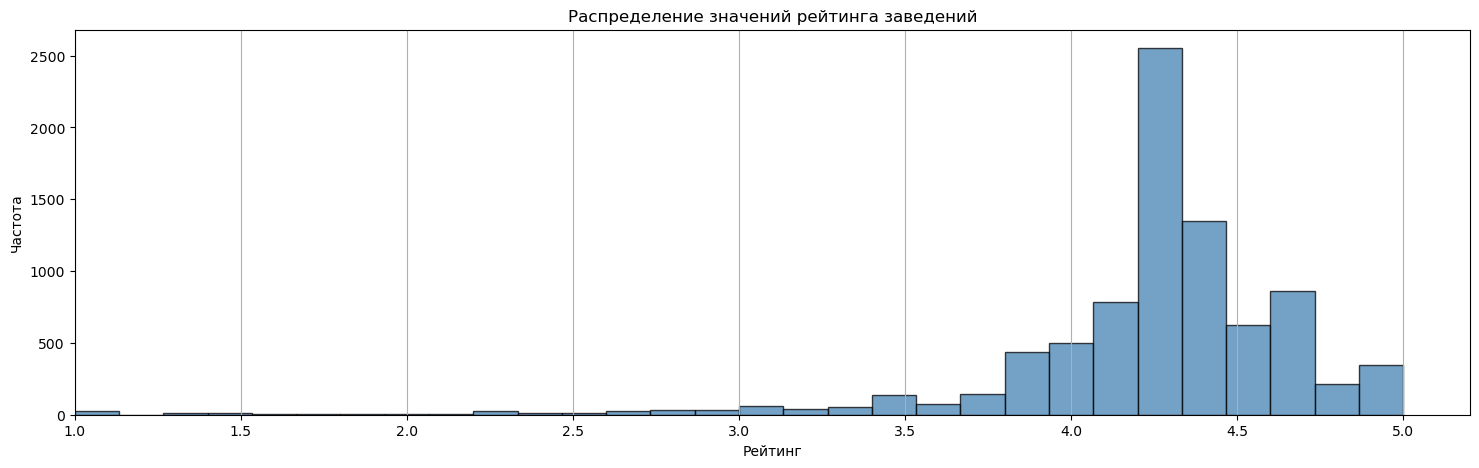

In [61]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(18, 5))

# Создаем переменную данных
df_rat = df['rating']

# Строим гистограмму с помощью pandas через plot(kind='hist')
ax = df_rat.plot(
                kind='hist', # Тип графика - гистограмма
                bins=30, # Устанавливаем количество корзин
                alpha=0.75,
                color='steelblue',
                edgecolor='black',
                range=(1, df_rat.max()),
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений рейтинга заведений')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')

# Устанавливаем границы осей, чтобы начать с нуля
plt.xlim(left=1)  # Начало оси X с 0
plt.ylim(bottom=0)  # Начало оси Y с 0

# Добавляем сетку графика
plt.grid(axis='x')

# Выводим график
plt.show()

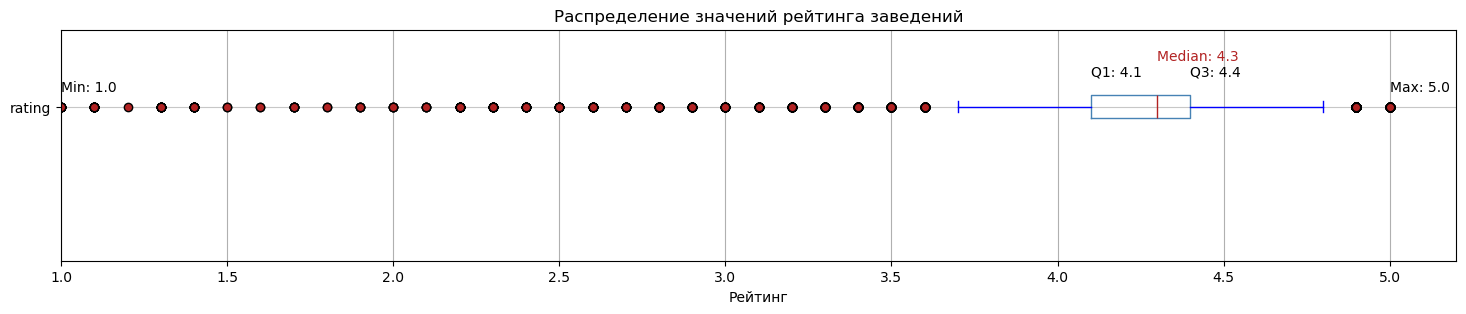

In [62]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(18, 3))

df_rating = df['rating']
df_rat = pd.DataFrame(df_rating)

# Строим диаграмму размаха значений в столбце score
df_rat.boxplot(column='rating',
                 vert=False,
                 boxprops=dict(color='steelblue'),  # Цвет ящика
                 whiskerprops=dict(color='blue'),  # Цвет усов
                 capprops=dict(color='blue'),  # Цвет концов усов
                 flierprops=dict(markerfacecolor='firebrick', marker='o'),  # Настройки для выбросов
                 medianprops=dict(color='firebrick'),  # Цвет медианы                 
)

# Добавляем заголовок и метки оси
plt.title('Распределение значений рейтинга заведений')
plt.xlabel('Рейтинг')

# Устанавливаем границы осей, чтобы начать с нуля
plt.xlim(left=1)  # Начало оси X с 0
plt.ylim(bottom=0)  # Начало оси Y с 0
   
# Выводим график
plt.grid(axis='y', alpha=0.7)

# Получаем данные о ящике и усах
median = stat_rat['50%']
q1 = stat_rat['25%']
q3 = stat_rat['75%']
min_val = stat_rat['min']
max_val = stat_rat['max']

# Добавляем текст значений ящика и усов
plt.text(min_val, 1.1, f'Min: {min_val}', color='black')
plt.text(q1, 1.2, f'Q1: {q1}', color='black')
plt.text(median, 1.3, f'Median: {median}', color='firebrick')
plt.text(q3, 1.2, f'Q3: {q3}', color='black')
plt.text(max_val, 1.1, f'Max: {max_val}', color='black')

plt.show()

**По результам исследования можно сказать следующие:**

- Хотя график данных имеет аномалии (хвост удленен слева), говорить о том, что это выбросы в таком параметре как рейтинг нельзя. Все оценки в диапазоне от 1 до 5 включительно имеют место быть.
- Выбросы есть и в большую и особенно в меньшую сторону.
- Основные показатели лежат в диапазоне 3,6 - 4,9.
- Медиана 4,3.

2. Изучим рейтинги заведений в зависимости от категории

- Посчитаем средний рейтинг заведения в зависимости от категории методом `.groupby()`:

In [63]:
# Посчитаем и выведем результат
print('Распределение рейтинга по категориям:')

group_rat_cat = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print(group_rat_cat)

Распределение рейтинга по категориям:
category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290402
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.124285
быстрое питание    4.050249
Name: rating, dtype: float64


- Для визуального анализа такого распределения используем столбчатую диаграмму. Визуализируем распределение в таблице `group_rat_cat`:

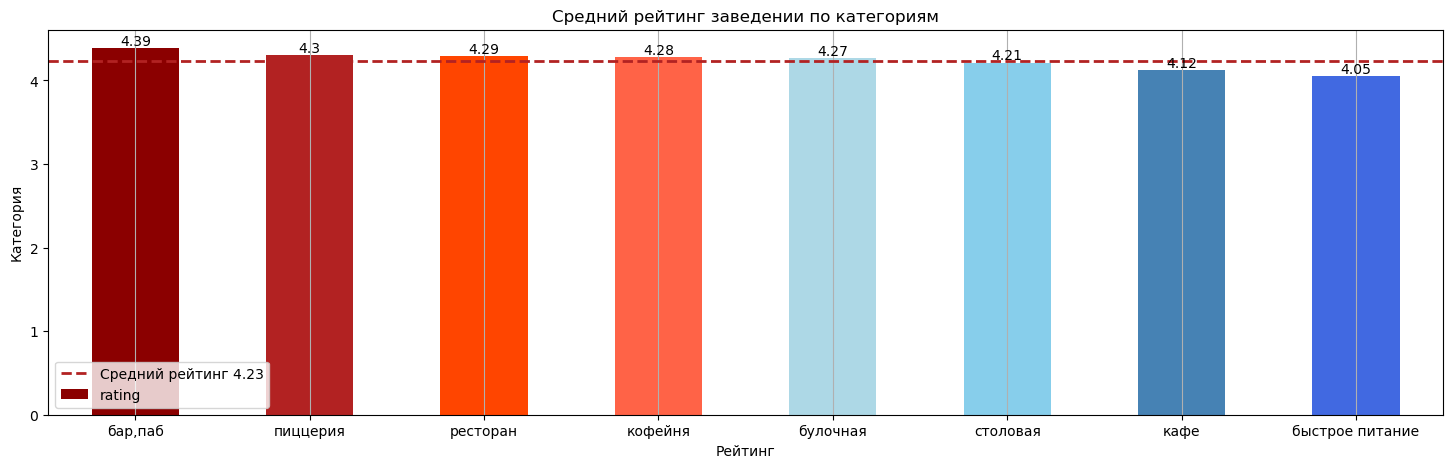

In [64]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(18, 5))

# Список цветов
colors = ['darkred', 'firebrick', 'orangered', 'tomato', 'lightblue', 'skyblue', 'steelblue', 'royalblue', 'blue']

# Строим столбчатую диаграмму с помощью pandas через plot(kind='barh')
group_rat_cat.plot(
               kind='bar', # Тип графика - линейчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               color=colors[:len(group_rat_cat)],
               title=f'Средний рейтинг заведении по категориям'
)

# Добавляем значения на график
for index, value in enumerate(group_rat_cat):
    plt.text(index, value, str(round(value,2)), ha='center', va='bottom')
    
# Настраиваем оформление графика
plt.xlabel('Рейтинг')
plt.ylabel('Категория')

mean_rating = df['rating'].mean()

# Наносим на график линию со средним значением рейтинга всех заведений
plt.axhline(mean_rating, # Данные, по которым строится линия
            color='firebrick', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=2, # Ширина линии
            label=f'Средний рейтинг {round(mean_rating,2)}')

# Добавляем сетку графика и легенду
plt.grid(axis='x')
plt.legend(loc='lower left')

# Выводим график
plt.show()

**По результатам исследования можно сказать следующее:**

- В среднем каждая категория заведений общественного питания имеет рейтинг выше 4.

- Наиболее высокий средний рейтинг у категории "бары/пабы" — около 4,4, что, вероятно, связано с более комфортной атмосферой, способствующей положительным оценкам посетителей.

- Самый низкий средний рейтинг зафиксирован в категории "быстрое питание" — около 4,05. Учитывая специфику этой категории, ориентированной на большой поток клиентов и быструю работу, такой рейтинг считается достаточно высоким и соответствует ожиданиям рынка.

#### Изучим корреляцию рейтинга заведений.

1. Рассчитаем матрицу корреляции `phi_k` для данных о рейтинге заведений общественного питания города Москвы 

- Для составления матрицы корреляции отобраны данные, которые могут влиять на рейтинг: категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным.
- Вычислим корреляционную матрицу, построим тепловую карту и изучим полученные результаты.

In [65]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['category', 
                         'district', 
                         'chain', 
                         'seats', 
                         'price',
                         'is_24_7',
                         'rating']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'is_24_7', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.281253
district,0.200761
category,0.189716
is_24_7,0.150365
chain,0.107833
seats,0.000000


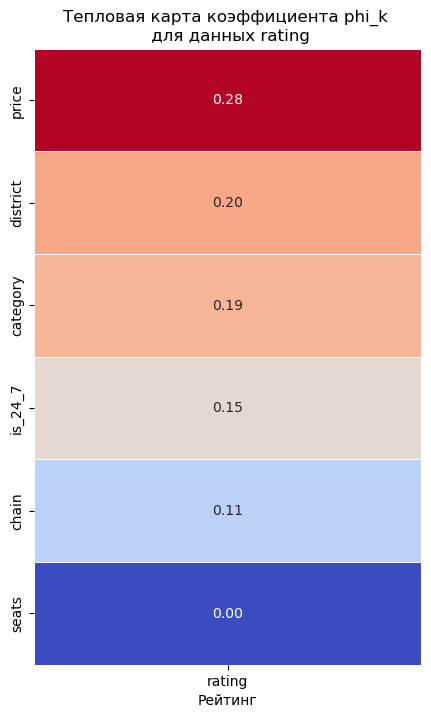

In [66]:
# Строим тепловую карту
plt.figure(figsize=(5, 8))

# Сохраняем матрицу корреляции рейтинга с другими данными
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', 
                                                                                                    ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
)

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг')

# Выводим график
plt.show()

**По результатам исследования можно сказать следующее:**

- Корреляция рейтинга с другими данными имеет слабый положительный характер от полного нуля до максинума 0,28 с данными о ценовой категории заведения

2. Изучим подробнее корреляцию `rating` и `price`

- Столцец рейтинга `rating` - числовой, столбец стутуса `price` - категориальный
- По статусу заведения мы имеем следующите уникальные значения столбца `price`: "no data", "выше среднего", "средние", "высокие", "низкие".
- Отфильтруем датасет, убрав строки с значением "no data"
- Затем в matplotlib необходимо построить 4 графика по разным значениям признака price. Удобно это сделать в цикле, который будет строить 4 графика в зависимости от `price`. Чтобы не прописывать значение `price` вручную, используем метод `.unique()` для определения уникальных значений
- Отдельно построим графики KDE

In [67]:
# Отфильтруем датасет, убрав строки "no data" в столбце `price`
df_price = df[df['price'] != 'no data']

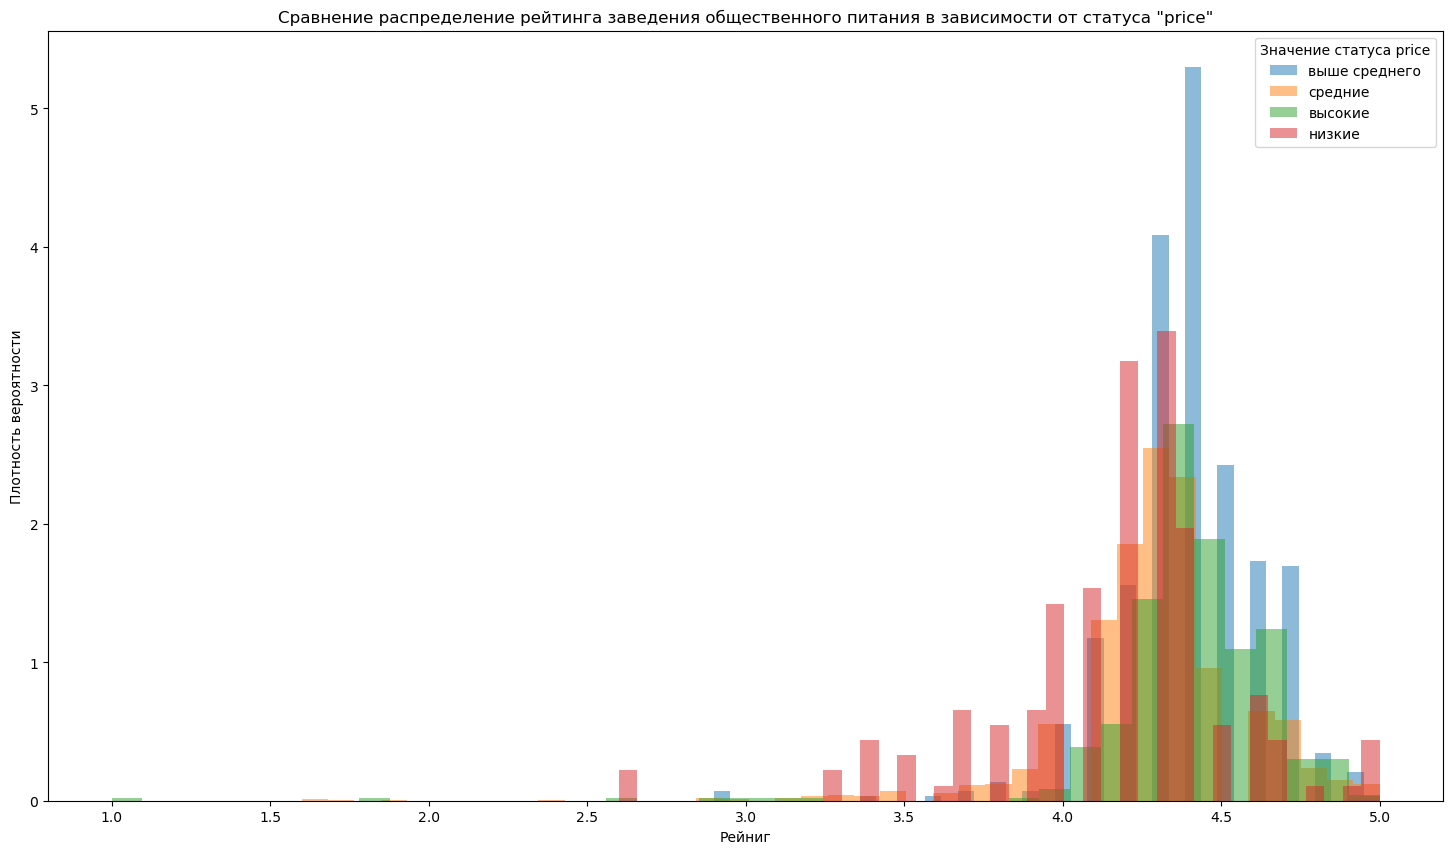

In [68]:
# Создаём фигуру графика
plt.figure(figsize=(18, 10))

# Строим гистограммы для каждого значения price
for i in df_price['price'].unique():
    # Фильтруем данные по значению столбца price
    df_price.loc[df_price['price'] == i, 'rating'].plot(
        kind='hist',
        density=True,
        bins=41, # 41 уникальное значение рейтинга
        alpha=0.5,
        label=f'{i}',
        legend=True
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение распределение рейтинга заведения общественного питания в зависимости от статуса "price"')
plt.xlabel('Рейниг')
plt.ylabel('Плотность вероятности')
plt.legend(title='Значение статуса price')

plt.show()

**!** *На данном графике достаточно сложно сделать корректные выводы, поэтому сделаем отдельный графики KDE*

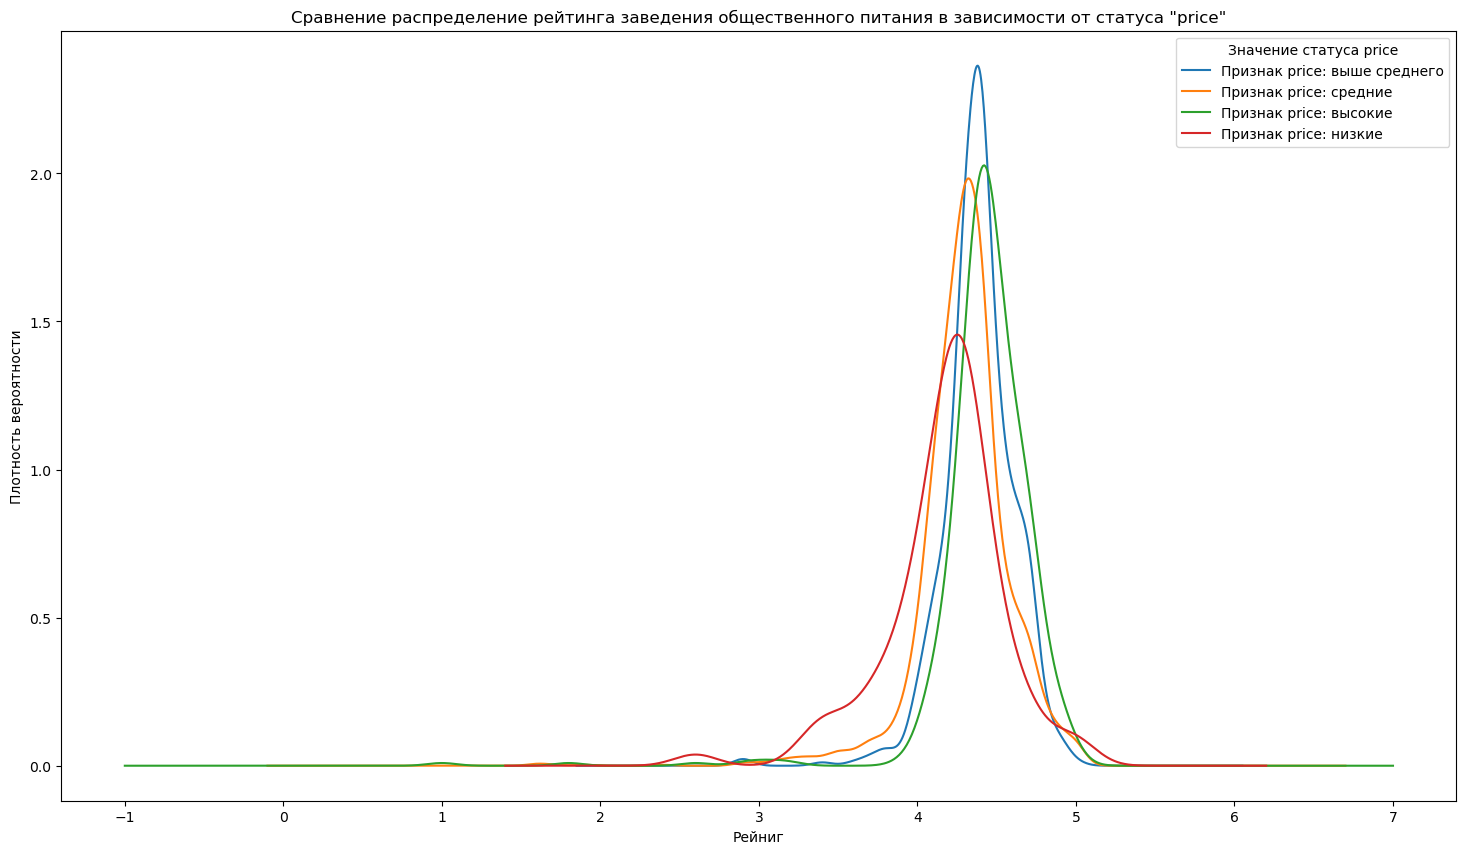

In [69]:
# Создаём фигуру графика
plt.figure(figsize=(18, 10))

# Строим графики KDE для каждого значения price
for i in df_price['price'].unique():
    # Фильтруем данные по значению столбца price
    df_price.loc[df['price'] == i, 'rating'].plot(
        kind='kde',
        alpha=1,
        label=f'Признак price: {i}',
        legend=True
)
    
# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение распределение рейтинга заведения общественного питания в зависимости от статуса "price"')
plt.xlabel('Рейниг')
plt.ylabel('Плотность вероятности')
plt.legend(title='Значение статуса price')

plt.show()

**По результатам исследования можно сказать следующее:**

- Все графики похожи, с вытянутым хвостом слева и пиками в районе рейтинга 4,1-4,3
- График статуса price "высокие" сдвинут правее всех в область большего рейтинга.
- График статуса price "низкие" сдвинут левее всех в область более низкого рейтинга.
- Таким образом, даже при слабой корреляции рейтинга с ценовым параметром можно сделать вывод, что заведения с более высоким ценником в среднем имеют более высокий рейтинг. Это, возможно, связано с большими инвестициями в качество обслуживания, атмосферу и репутацию, что повышает удовлетворенность посетителей.

#### Найдем топ-15 популярных сетей в городе Москве. (Под популярностью понимается количество заведений этой сети в регионе). 

**Изучим данные сетей:**
- Отфильтруем сети
- Сгруппируем данные по названию и категории, посчитаем количество заведений и среднее значение рейтинга сети
- Отсортируем данные и выведем топ-15 популярных сетей города Москвы
- Визуалицируем данные

In [70]:
# Произведем необходимые методы для получения топ-15 заведений
df_ch_1 = df[df['chain']==1].copy()
top_name = df_ch_1.groupby(['name', 'category'])['rating'].agg(['count', 'mean'])
top_name = top_name.sort_values(by='count', ascending=False).head(15)

# Востановим все использованные столбцы, так как они нам понадобятся
top_name = top_name.reset_index()
top_name.columns = ['name', 'category', 'count', 'mean']

# Выводим результат
print('Топ-15 заведений Москвы')
display(top_name)

Топ-15 заведений Москвы


,name,category,count,mean
0,ШОКОЛАДНИЦА,кофейня,119,4.178151
1,ДОМИНО'С ПИЦЦА,пиццерия,76,4.169737
2,ДОДО ПИЦЦА,пиццерия,74,4.286486
3,ONE PRICE COFFEE,кофейня,71,4.064789
4,ЯНДЕКС ЛАВКА,ресторан,69,3.872464
5,COFIX,кофейня,65,4.075385
6,PRIME,ресторан,49,4.114286
7,КОФЕПОРТ,кофейня,42,4.147619
8,КУЛИНАРНАЯ ЛАВКА БРАТЬЕВ КАРАВАЕВЫХ,кафе,39,4.394872
9,ТЕРЕМОК,ресторан,36,4.105556


Для визуального анализа такого распределения используем линейные подграфики. Визуализируем распределение:

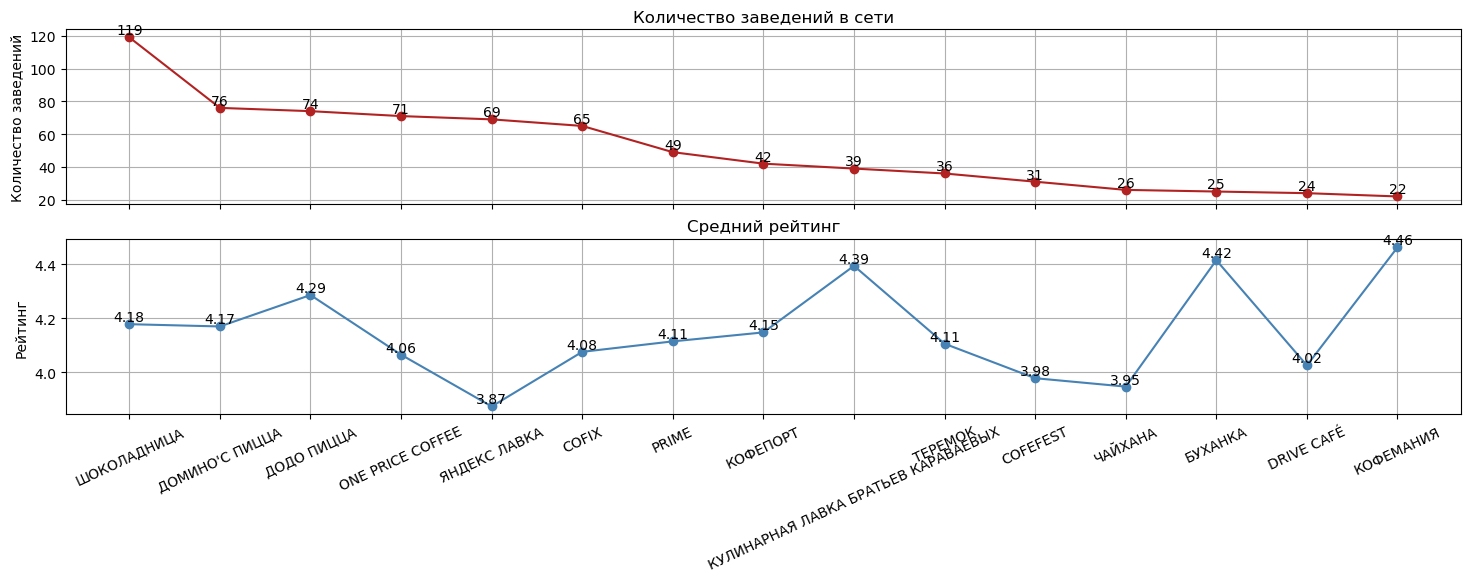

In [71]:
# Строим график
axes = top_name.plot(kind='line',
            subplots=True,
            sharex=True,
            sharey=False,
            legend=False,
            title=['Количество заведений в сети', 'Средний рейтинг'],
            figsize=(18, 5),
            color=['firebrick', 'steelblue'],      
            marker='o', # Установка маркера для точек 
            grid=True
)

# Устанавливаем подпись для оси Y каждого из подграфиков
axes[0].set_ylabel('Количество заведений')
axes[1].set_ylabel('Рейтинг')

# Добавляем подписи значений на графиках
for ax in axes:
    for i, value in enumerate(ax.lines[0].get_ydata()):
        ax.text(i, value, str(round(value,2)), ha='center', va='bottom')
        
# Устанавливаем все названия по оси Х
plt.xticks(ticks=range(len(top_name['name'])), labels=top_name['name'], rotation=25)  # Используем labels для задания имен

# Уберем название оси X (изишнее)
plt.xlabel('')
plt.show()

**По результатам исследования можно сказать следующее:**

- В топ-15 по количеству заведений попали 6 заведений категории "кафейн", 3 - "ресторана", 3 "кафе" и 2 - "пиццерии".  
- Лидер кофейня "Шоколадница" со 119 заведениями.
- Засисимости между рейтингом и сетевым заведением общественного питания нет. Средний рейтинг топ-15 находится в диапазоне 3.87-4.46.

#### Изучим вариацию среднего чека заведения в зависимости от района города Москвы.

1. Изучим средний чек заведений общественного питания города Москвы в зависимости от района

- Создадим сводную таблицу с расчетом среднего чека в разрезе районов
- Предварительно отфильтруем данные от пустых значений
- Визуалицируем данные

In [72]:
# Отфильтруем данные от нулевых значений
df_avg_bill = df[df['avg_bill_name'] == 'средний счёт'].copy()

In [73]:
# Посчитаем и выведем результат
print('Распределение среднего чека в завимости от района:')

group_avg_bill_dis = df_avg_bill.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False)
print(group_avg_bill_dis)

Распределение среднего чека в завимости от района:
district
Центральный ао         1191.057547
Западный ао            1053.225490
Северный ао             927.959627
Южный ао                834.398089
Северо-Западный ао      822.222930
Восточный ао            820.626923
Юго-Западный ао         792.561702
Северо-Восточный ао     716.611296
Юго-Восточный ао        654.097938
Name: middle_avg_bill, dtype: float64


- Для визуального анализа такого распределения используем столбчатую диаграмму. Визуализируем распределение в таблице:

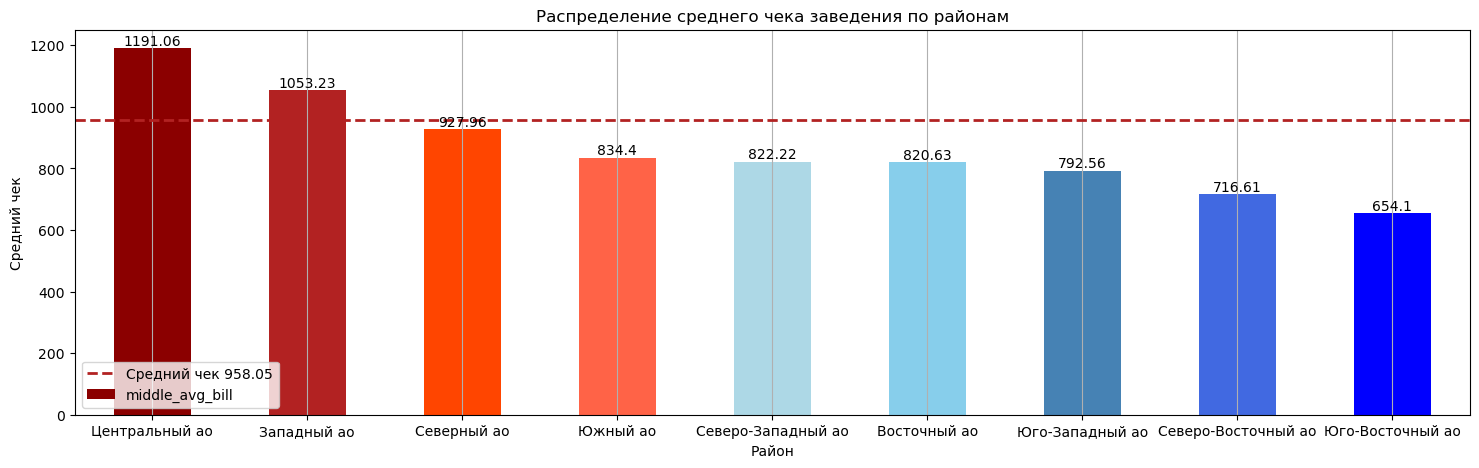

In [74]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(18, 5))

# Список цветов
colors = ['darkred', 'firebrick', 'orangered', 'tomato', 'lightblue', 'skyblue', 'steelblue', 'royalblue', 'blue']

# Строим столбчатую диаграмму с помощью pandas через plot(kind='barh')
group_avg_bill_dis.plot(
               kind='bar', # Тип графика - линейчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               color=colors[:len(group_avg_bill_dis)],
               title=f'Распределение среднего чека заведения по районам'
)

# Добавляем значения на график
for index, value in enumerate(group_avg_bill_dis):
    plt.text(index, value, str(round(value,2)), ha='center', va='bottom')
    
# Настраиваем оформление графика
plt.xlabel('Район')
plt.ylabel('Средний чек')

mean_bill = df_avg_bill['middle_avg_bill'].mean()

# Наносим на график линию со средним значением рейтинга всех заведений
plt.axhline(mean_bill, # Данные, по которым строится линия
            color='firebrick', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=2, # Ширина линии
            label=f'Средний чек {round(mean_bill,2)}')

# Добавляем сетку графика и легенду
plt.grid(axis='x')
plt.legend(loc='lower left')

# Выводим график
plt.show()

**По результатам исследования можно сказать следующее:**

- Наибольший средний чек наблюдается в Центральном административном округе — около 1200 рублей. В этом районе сосредоточено большинство ресторанов с дорогой кухней.

- Наименьший средний чек — в Юго-Восточном административном округе, примерно 650 рублей. Чтобы понять причины этого, необходимо дополнительно изучить характеристики района, такие как его тип (промышленный, жилой или студенческий), экологическая обстановка, наличие торговых центров и парков.

- В остальных районах диапазон среднего чека колеблется от 700 до 1050 рублей.

2. Изучим распределение категорий заведений по районам и среднему чеку

- Создадим сводную таблицу только для тех заведений, у которых был указал "средний счёт"

In [75]:
# Создадим сводную таблицу
pivot_district = df_avg_bill.pivot_table(values='id',
                                         columns = 'category',
                                         index='district',
                                         aggfunc=['count'], 
                                         margins=True,  # Добавим итог
                                         margins_name='Итого'  )
# Выведем результат
print('Количество заведении в разрезе районов и категорий')
display(pivot_district)

Количество заведении в разрезе районов и категорий


count                                                 \
category            бар,паб булочная быстрое питание кафе кофейня пиццерия   
district                                                                     
Восточный ао             26        9              11   68       9       49   
Западный ао              18        8              30   62      18       42   
Северный ао              37        2              23   68      19       55   
Северо-Восточный ао      23        7              29   77      19       41   
Северо-Западный ао       14        1              16   32      11       24   
Центральный ао          173       12              49  210      85       81   
Юго-Восточный ао         11        2              21   57      10       25   
Юго-Западный ао          19        6              19   58      11       35   
Южный ао                 28        6              39   62      18       43   
Итого                   349       53             237  694     200      395   

                                             
category            ресторан столовая Итого  
district                                     
Восточный ао              68       20   260  
Западный ао              116       12   306  
Северный ао               96       22   322  
Северо-Восточный ао       84       21   301  
Северо-Западный ао        48       11   157  
Центральный ао           406       44  1060  
Юго-Восточный ао          54       14   194  
Юго-Западный ао           78        9   235  
Южный ао                  90       28   314  
Итого                   1040      181  3149

- Создадим сводную таблицу с расчетом среднего чека в разрезе категорий на отфильтрованном ранее датафрейме
- Визуалицируем данные

In [76]:
# Посчитаем и выведем результат
print('Распределение среднего чека в завимости от категории заведения:')

group_avg_bill_cat = df_avg_bill.groupby('category')['middle_avg_bill'].mean().sort_values(ascending=False)
print(group_avg_bill_cat)

Распределение среднего чека в завимости от категории заведения:
category
ресторан           1367.881731
бар,паб            1338.762178
пиццерия            789.377215
кафе                707.753602
булочная            658.773585
кофейня             614.210000
быстрое питание     445.763713
столовая            335.348066
Name: middle_avg_bill, dtype: float64


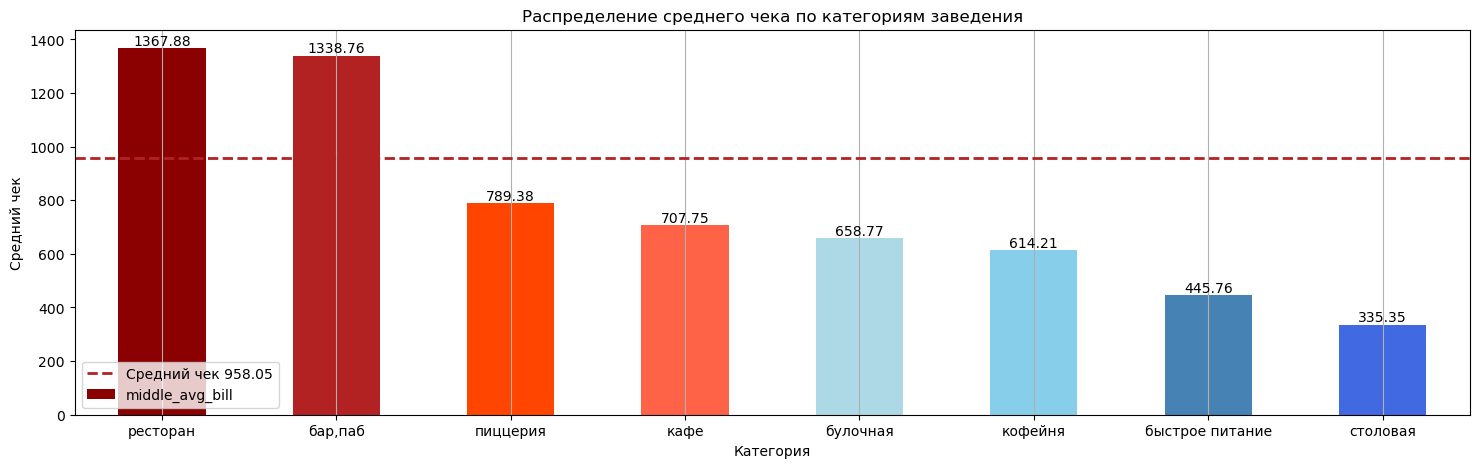

In [77]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(18, 5))

# Список цветов
colors = ['darkred', 'firebrick', 'orangered', 'tomato', 'lightblue', 'skyblue', 'steelblue', 'royalblue', 'blue']

# Строим столбчатую диаграмму с помощью pandas через plot(kind='barh')
group_avg_bill_cat.plot(
               kind='bar', # Тип графика - линейчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               color=colors[:len(group_avg_bill_cat)],
               title=f'Распределение среднего чека по категориям заведения'
)

# Добавляем значения на график
for index, value in enumerate(group_avg_bill_cat):
    plt.text(index, value, str(round(value,2)), ha='center', va='bottom')
    
# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Средний чек')

mean_bill = df_avg_bill['middle_avg_bill'].mean()

# Наносим на график линию со средним значением рейтинга всех заведений
plt.axhline(mean_bill, # Данные, по которым строится линия
            color='firebrick', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=2, # Ширина линии
            label=f'Средний чек {round(mean_bill,2)}')

# Добавляем сетку графика и легенду
plt.grid(axis='x')
plt.legend(loc='lower left')

# Выводим график
plt.show()

**По результатам исследования можно сказать следующее:**

- Заметна положительная корреляция между количеством ресторанов и величиной среднего чека в районе.
- Средний чек в Центральном округе города Москвы выше за счет большего количества таких высокочековых категорий заведений как "рестораны" и "бары/пабы"

#### Изучим среднюю цену чашки капучино

Изучим среднюю цену чашки капучино в заведениях общественного питания города Москвы в зависимости от района:

- Создадим сводную таблицу с расчетом средней цены чашки капучино в разрезе районов
- Предварительно отфильтруем данные от пустых значений
- Визуалицируем данные

In [78]:
# Отфильтруем данные от пустых значений
df_avg_cup = df[df['avg_bill_name'] == 'цена чашки капучино'].copy()

In [79]:
# Посчитаем и выведем результат
print('Распределение средней цены чашки капучино в завимости от района:')

group_avg_cup = df_avg_cup.groupby('district')['middle_coffee_cup'].mean().sort_values(ascending=False)
print(group_avg_cup)

Распределение средней цены чашки капучино в завимости от района:
district
Западный ао            189.640000
Центральный ао         188.210843
Юго-Западный ао        183.485714
Восточный ао           174.023810
Северо-Восточный ао    165.333333
Северный ао            165.090909
Северо-Западный ао     160.458333
Южный ао               157.826087
Юго-Восточный ао       150.771429
Name: middle_coffee_cup, dtype: float64


- Для визуального анализа такого распределения используем столбчатую диаграмму. Визуализируем распределение в таблице:

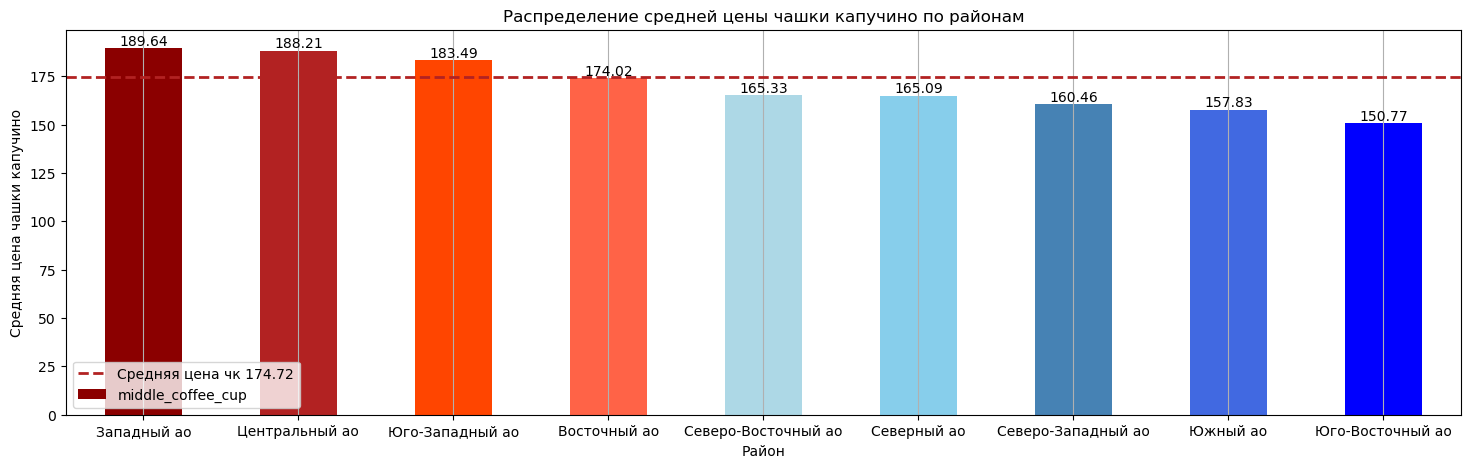

In [80]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(18, 5))

# Список цветов
colors = ['darkred', 'firebrick', 'orangered', 'tomato', 'lightblue', 'skyblue', 'steelblue', 'royalblue', 'blue']

# Строим столбчатую диаграмму с помощью pandas через plot(kind='barh')
group_avg_cup.plot(
               kind='bar', # Тип графика - линейчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               color=colors[:len(group_avg_cup)],
               title=f'Распределение средней цены чашки капучино по районам'
)

# Добавляем значения на график
for index, value in enumerate(group_avg_cup):
    plt.text(index, value, str(round(value,2)), ha='center', va='bottom')
    
# Настраиваем оформление графика
plt.xlabel('Район')
plt.ylabel('Средняя цена чашки капучино')

mean_cup = df_avg_cup['middle_coffee_cup'].mean()

# Наносим на график линию со средним значением рейтинга всех заведений
plt.axhline(mean_cup, # Данные, по которым строится линия
            color='firebrick', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=2, # Ширина линии
            label=f'Средняя цена чк {round(mean_cup,2)}')

# Добавляем сетку графика и легенду
plt.grid(axis='x')
plt.legend(loc='lower left')

# Выводим график
plt.show()

**По результатам исследования можно сказать следующее:**

- Наибольшая средняя цена чашки капучино отмечена в Западном АО — около 190 рублей, в Центральном АО — 188 рублей и в Юго-Западном АО — 183 рубля.

- Наименьшая средняя цена — в Юго-Восточном административном округе, примерно 151 рублей.

- В остальных районах диапазон средней цены колеблется от 160 до 174 рублей.

Для определения причин этих различий необходимо дополнительно изучить характеристики районов, такие как тип застройки (промышленный, жилой), наличие студенческих заведений, торговых центров, парков и других факторов.

#### Изучим среднюю цену бокала пива

Изучим среднюю цену бокала пива в заведениях общественного питания города Москвы в зависимости от района:

- Создадим таблицу с расчетом средней цены бокала пива в разрезе районов
- Предварительно отфильтруем данные
- Визуалицируем данные

In [81]:
# Отфильтруем данные от пустых значений
df_beer = df[df['avg_bill_name'] == 'цена бокала пива'].copy()

In [82]:
# Узнаем уникальные категории, которые выбрали в приоритете указать цену за бокал пива
print(df_beer['category'].unique())

['бар,паб' 'пиццерия']


В связи с отсутствием столбца со значения средней цены бокала пива, извлечем эту информацию из столбца `avg_bill`

In [83]:
# Функция для извлечения цен
def extract_prices(bill):
    # Удаляем ненужные символы
    bill = bill.replace('цена бокала пива: ', '').replace(' р.', '').replace(
        'цена бокала пива:', '').replace(' ₽', '').replace('от ', '').replace('до ', '') 
    if '–' in bill:          # Проверяем, есть ли диапазон (символ '–')
        prices = bill.split('–')
        return [int(price) for price in prices]
    else:
        return [int(bill)]  # Возвращаем только одно значение в списке

# Применяем функцию и создаем новый столбец для цен
df_beer['price_beer'] = df_beer['avg_bill'].apply(extract_prices)

# Находим среднее для каждой пары цен
df_beer['avg_price_beer'] = df_beer['price_beer'].apply(lambda x: sum(x) / len(x))

In [84]:
# Сгруппируем данные и выведем таблицу
top_beer = df_beer.groupby(['name', 'category', 'district']).agg(rat_count=('rating', 'count'),
                                                                                             rat_mean=('rating', 'mean'),
                                                                                             avg_price=('avg_price_beer', 'mean'))

# Сортировка по средней оценке и отбор топ-10
top_beer = top_beer.sort_values(by='rat_mean', ascending=False).head(15)

# Востановим все использованные столбцы, так как они нам понадобятся
top_beer = top_beer.reset_index()
top_beer.columns = ['name', 'category', 'district', 'rat_count', 'rat_mean', 'avg_price']

# Выводим результат
print('Топ-15 пивных заведений Москвы')
display(top_beer)

Топ-15 пивных заведений Москвы


,name,category,district,rat_count,rat_mean,avg_price
0,ТРАППИСТ,"бар,паб",Центральный ао,1,5.0,350.0
1,ДАЧА ГАШЕКА,"бар,паб",Центральный ао,1,5.0,280.0
2,ШТАБ КВАРТИРА,"бар,паб",Северный ао,1,5.0,235.0
3,JOHN GILROY'S PUB,"бар,паб",Юго-Восточный ао,1,5.0,360.0
4,MISSION • ETHICAL SPACE,"бар,паб",Центральный ао,1,4.9,325.0
5,РАКОВАРНЯ КЛЕШНИ И ХВОСТЫ,"бар,паб",Юго-Восточный ао,1,4.9,200.0
6,MARTINEZ,"бар,паб",Центральный ао,1,4.9,350.0
7,РЮМОЧНАЯ СВОБОДА,"бар,паб",Центральный ао,1,4.9,330.0
8,КВАРТИРА ПАБ,"бар,паб",Северо-Западный ао,1,4.9,255.0
9,WE CIDRERIA,"бар,паб",Центральный ао,1,4.9,395.0


- Для визуального анализа такого распределения используем линейные подграфики. Визуализируем распределение:

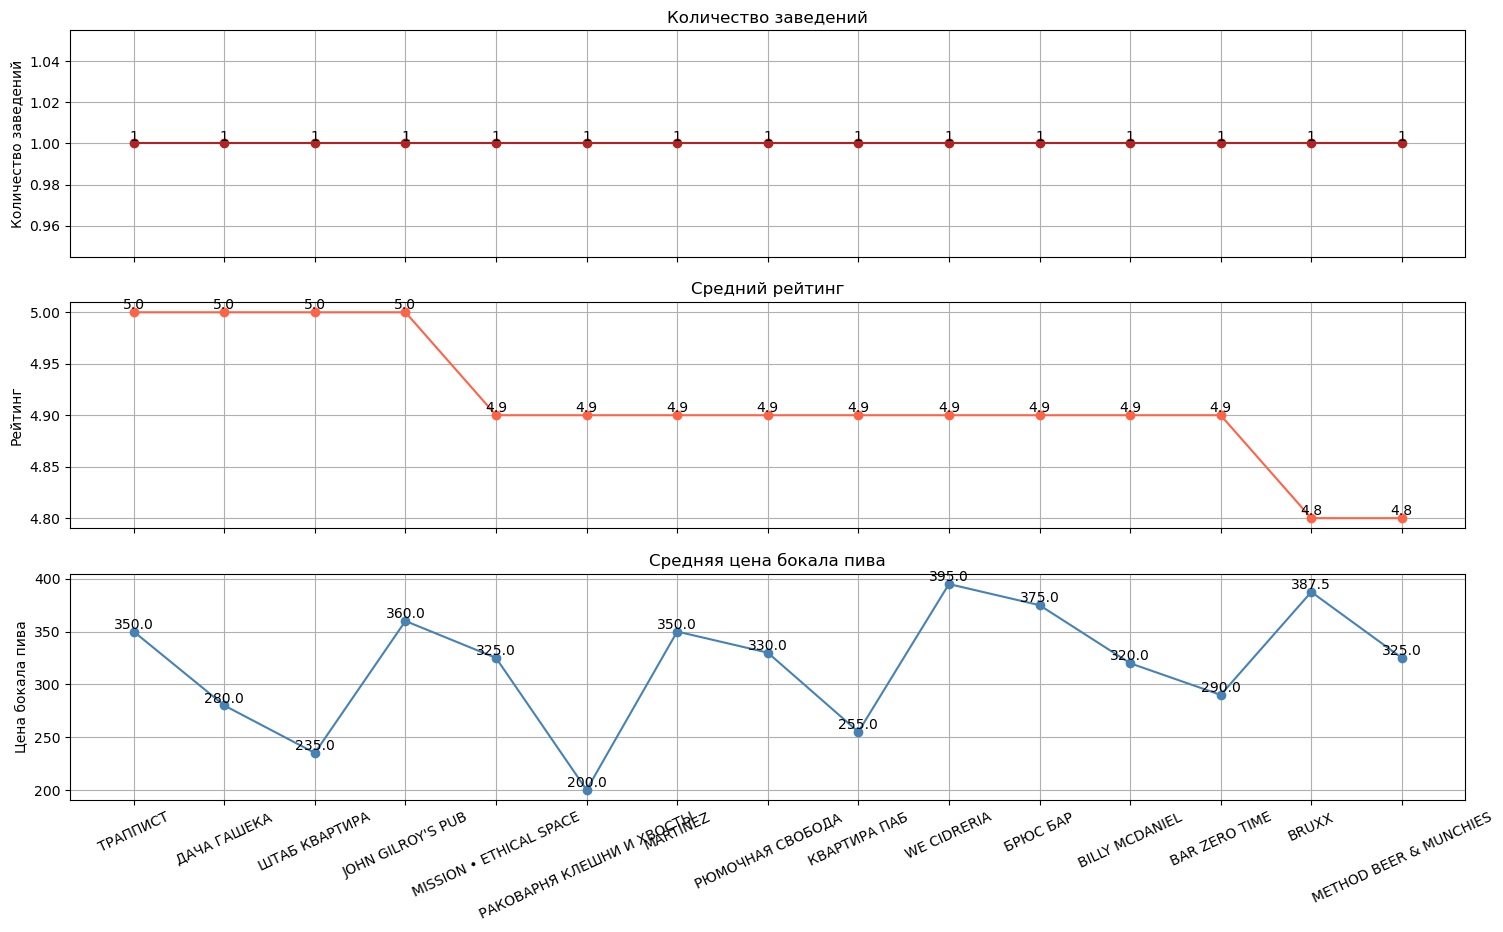

In [85]:
# Строим график
axes = top_beer.plot(kind='line',
            subplots=True,
            sharex=True,
            sharey=False,
            legend=False,
            title=['Количество заведений', 'Средний рейтинг', 'Средняя цена бокала пива'],
            figsize=(18, 10),
            color=['firebrick', 'tomato', 'steelblue'],
            marker='o', # Установка маркера для точек 
            rot=90,
            grid=True
)

# Устанавливаем подпись для оси Y каждого из подграфиков
axes[0].set_ylabel('Количество заведений')
axes[1].set_ylabel('Рейтинг')
axes[2].set_ylabel('Цена бокала пива')

# Добавляем подписи значений на графиках
for ax in axes:
    for i, value in enumerate(ax.lines[0].get_ydata()):
        ax.text(i, value, str(round(value,2)), ha='center', va='bottom')
        
# Устанавливаем все названия по оси Х
plt.xticks(ticks=range(len(top_beer['name'])), labels=top_beer['name'], rotation=25)  # Используем labels для задания имен

# Уберем название оси X (изишнее)
plt.xlabel('')
plt.show()

**По результатам исследования можно сказать следующее:**

- Только заведения категории "бар/паб" и в меньшей степени "пиццерия" демонстрируют явный приоритет в столбце avg_bill, указывающем цену за бокал пива. Однако по популярности среди этих заведений лидируют именно "бары/пабы".

- Лучшие пивные заведения расположены в Центральном АО (9 заведений), а также по одному в Северном, Северо-Западном и Южном АО, а в Юго-Восточном АО — три заведения.

- Все топовые заведения не являются сетевыми. Вероятные причины — качество, расходы и другие факторы, влияющие на результат.

- Средняя цена за бокал пива наиболее высокая в Центральном АО — около 395 рублей.

- Наименьшая средняя цена за бокал пива зафиксирована в Юго-Восточном АО — примерно 200 рублей.

- Диапазон средней цены в остальных районах колеблется от 235 до 390 рублей.

Для определения причин таких различий необходимо дополнительно изучить характеристики районов: их тип (промышленный, жилой), наличие студенческих заведений, торговых центров, парков и других факторов.

#### Изучим распределение данных по режиму работы заведений (столбец `is_24_7`)

1. Посчитаем количество заведений в разрезе режима работы методом `.value_counts()` (где 1 - круглосуточно, 0 - другой)

In [86]:
# Посчитаем и выведем результат
print('Распределение данных по значениям столбца is_24_7:')

df['is_24_7'].value_counts()

Распределение данных по значениям столбца is_24_7:


is_24_7
0    7672
1     730
Name: count, dtype: int64

In [87]:
# Посчитаем в относительных значениях
df['is_24_7'].value_counts(normalize=True)

is_24_7
0    0.913116
1    0.086884
Name: proportion, dtype: float64

- В результате имеем 730 заведения работающих круглосуточно и 7672, работающих в другом режиме.

- Для визуального анализа такого распределения используем столбчатую диаграмму. Визуализируем распределение в столбце `is_24_7`:

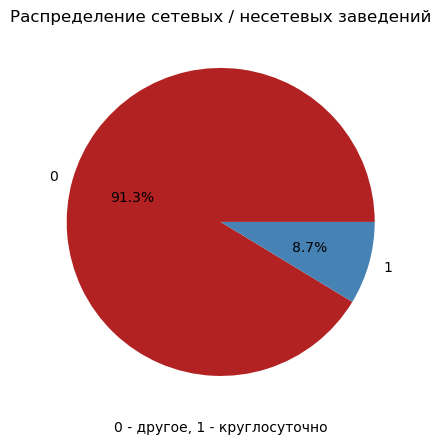

In [88]:
# Создаем переменную данных
df_is_24_7 = df['is_24_7'].value_counts(normalize=True)

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(18, 5))

# Список цветов
colors = ['firebrick', 'steelblue']

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
axes = df_is_24_7.plot( # переведем в проценты
               kind='pie', # Тип графика - столбчатая диаграмма
               autopct = '%1.1f%%',
               legend=False, # Выключаем легенду
               colors=colors[:len(df_is_24_7)],
               title=f'Распределение сетевых / несетевых заведений'
)

# Настраиваем оформление графика
plt.xlabel('0 - другое, 1 - круглосуточно')
plt.ylabel('')

# Поворот графика
axes.set_aspect('equal')

# Выводим график
plt.show()

**По результатам исследования можно сказать следующее:**

- Круглосуточный режим работы заведения не самый популярный вид, менее 10%.

2. Рассчитаем матрицу корреляции `phi_k` для данных о режиме работы заведений общественного питания Москвы 

- Для составления матрицы корреляции для режима работы заведений, отобраны данные, которые могут влиять на показатель: категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория.
  
- Постороим тепловую карту

In [89]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['category', 
                         'district', 
                         'chain', 
                         'seats', 
                         'price',
                         'is_24_7',
                         'rating']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'is_24_7'][['is_24_7']].sort_values(by='is_24_7', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'is_24_7', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,is_24_7
category,0.244815
rating,0.150365
district,0.076357
price,0.063702
chain,0.043488
seats,0.043193


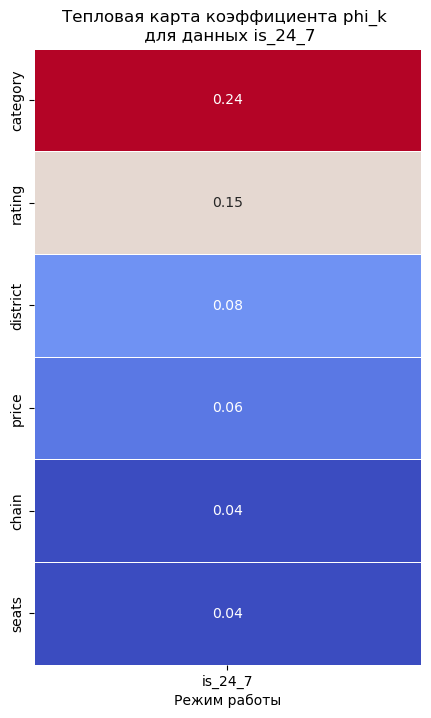

In [90]:
# Строим тепловую карту
plt.figure(figsize=(5, 8))

# Сохраняем матрицу корреляции рейтинга с другими данными
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'is_24_7'][['is_24_7']].sort_values(by='is_24_7', 
                                                                                                    ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
)

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных is_24_7')
plt.xlabel('Режим работы')

# Выводим график
plt.show()

**По результатам исследования можно сказать следующее:**

- Корреляция режима работы заведения с другими данными имеет слабый характер от 0,04 до максинума 0,24

3. Изучим распределение данных по режиму работы заведения и его категории и района расположения

- Изучим распределение данных по значениям столбца `chain` в разрезе категорий заведений и районов города с помощью метода `.groupby()`

In [91]:
# Сгруппируем данные по категориям и посчитаем количество заведений в разрезе режима работы
pivot_cat_24_7 = df.pivot_table(index='category', columns='is_24_7', values='name', aggfunc='count')
print(pivot_cat_24_7)

is_24_7             0    1
category                  
бар,паб           712   52
булочная          232   24
быстрое питание   453  150
кафе             2109  267
кофейня          1354   59
пиццерия          602   31
ресторан         1907  135
столовая          303   12


- Для визуального анализа такого распределения используем столбчатую диаграмму. Визуализируем распределение в столбце `is_24_7` по категориям заведений столбца `category`:

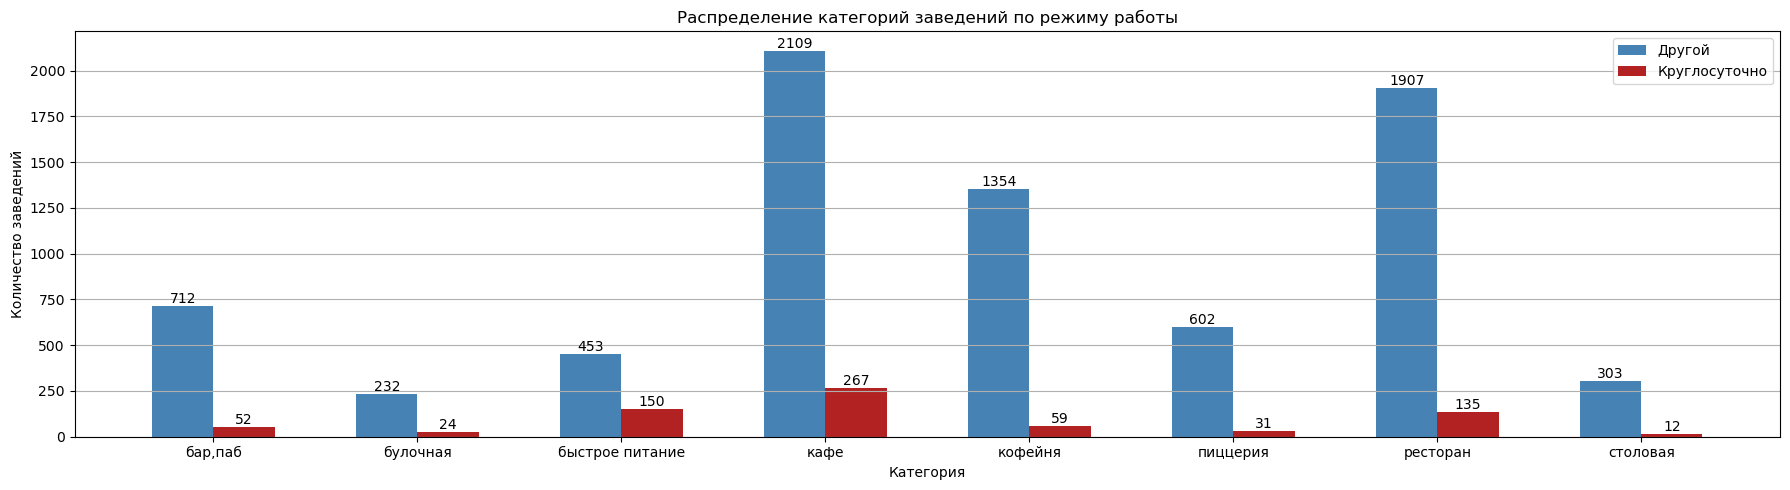

In [92]:
# Параметры графика
width = 0.3
category = list(pivot_cat_24_7.index)
x = range(len(category))

# Создаем график
fig, ax = plt.subplots(figsize=(18, 5))

bar1 = ax.bar([i - width/2 for i in x], pivot_cat_24_7[0], width, label='Другой', color='steelblue') # Создаем столбцы
bar2 = ax.bar([i + width/2 for i in x], pivot_cat_24_7[1], width, label='Круглосуточно', color='firebrick')

ax.set_title('Распределение категорий заведений по режиму работы')
ax.set_ylabel('Количество заведений')
ax.set_xlabel('Категория')
ax.set_xticks(x)
ax.set_xticklabels(category, rotation=0)
ax.legend()

# Добавляем значения на график
for bar in bar1:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
        str(bar.get_height()), ha='center', va='bottom')
for bar in bar2:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
        str(bar.get_height()), ha='center', va='bottom')

# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.tight_layout() # Настроим отступы
plt.show()

In [93]:
# Сгруппируем данные по районам и посчитаем количество заведений в разрезе режима работы
pivot_dis_24_7 = df.pivot_table(index='district', columns='is_24_7', values='name', aggfunc='count')
print(pivot_dis_24_7)

is_24_7                 0    1
district                      
Восточный ао          701   97
Западный ао           778   72
Северный ао           827   71
Северо-Восточный ао   815   75
Северо-Западный ао    366   43
Центральный ао       2111  131
Юго-Восточный ао      621   93
Юго-Западный ао       636   73
Южный ао              817   75


- Для визуального анализа такого распределения используем столбчатую диаграмму. Визуализируем распределение в столбце `is_24_7` по районам города столбца `district`:

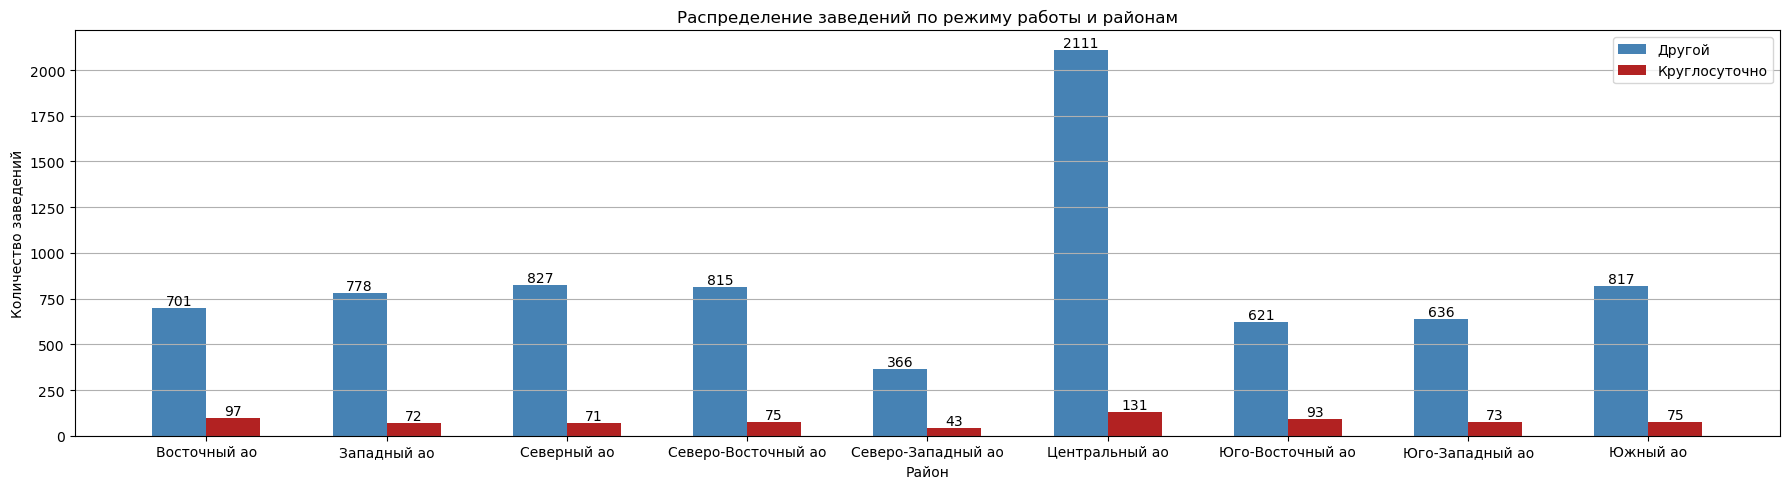

In [94]:
# Параметры графика
width = 0.3
district = list(pivot_dis_24_7.index)
x = range(len(district))

# Создаем график
fig, ax = plt.subplots(figsize=(18, 5))

bar3 = ax.bar([i - width/2 for i in x], pivot_dis_24_7[0], width, label='Другой', color='steelblue') # Создаем столбцы
bar4 = ax.bar([i + width/2 for i in x], pivot_dis_24_7[1], width, label='Круглосуточно', color='firebrick')

ax.set_title('Распределение заведений по режиму работы и районам')
ax.set_ylabel('Количество заведений')
ax.set_xlabel('Район')
ax.set_xticks(x)
ax.set_xticklabels(district, rotation=0)
ax.legend()

# Добавляем значения на график
for bar in bar3:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
        str(bar.get_height()), ha='center', va='bottom')
for bar in bar4:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
        str(bar.get_height()), ha='center', va='bottom')

# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.tight_layout() # Настроим отступы
plt.show()

**По результатам исследования можно сказать следующее:**

- Наиболее популярным режимом работы является круглосуточный режим для категорий "кафе" и "рестораны", что, вероятно, связано с высокой конкуренцией и активным ритмом жизни крупного города.

- Меньше всего заведений круглосуточного режима зарегистрировано в категориях "столовые", "булочные" и "пиццерии", что логично. “Столовые” ориентированы на поток клиентов в обеденное время, “булочные” в основном работают утром и вечером для ежедневных покупок, а “пиццерии” зачастую имеют семейный формат и не предполагают позднего часа работы.

- В категории "бары/пабы" из 764 заведений только 52 работают круглосуточно. Вероятно это связано с вечерней orientацией, правовыми ограничениями, экономической невыгодностью круглосуточной работы и спросом в основном вечером и ночью.

- Среди районов чаще встречаются заведения с круглосуточным режимом в Центральном АО, что соответствует характеру ночной жизни столицы.

- Наименьшее количество таких заведений наблюдается в Северо-Западном АО, что может быть связано с изначально меньшим количеством заведений в этом районе по сравнению с другими.

---

**Промежуточный вывод:**

- Представленные данные носят обобщающую информацию, которая низко коррелируется между собой.
- В общем организаторы общественного питания в городе Москва выбирают центр города и заведения категории "рестораны", "кафе" и "кофейни".
- Средний чек в заведениях составляет около 1 тыс.руб
- Заведения в соотношении 60/40 несетвые в основном не работающие круглосуточно.

---

### Общий обзор проделанной работы

В ходе исследования был проанализирован массив данных, включающий 8 402 заведения общественного питания в городе Москве. В набор данных входили следующие параметры: наименование заведения, район города, категория заведения, часы работы, рейтинг, статус принадлежности к сети и данные о среднем счёте. Основной целью исследования было выявление взаимосвязей между этими параметрами и определение наиболее выгодных и гармоничных сочетаний.

**Ответы на исследовательские вопросы, или главные выводы:**

1. В данных представлены восемь уникальных категорий заведений: "рестораны", "кафе", "кофейни", "бары/пабы", "пиццерии", "булочные", "столовые" и заведения быстрого питания. Наибольшее количество заведений относится к категориям «кафе» (2 376) и «рестораны» (2 042), что свидетельствует о высокой популярности этих форматов. Наименьшее число — у «булочных» (256) и «столовых» (315), что вполне ожидаемо с учетом их особенностей и масштаба работы.

2. В данных представлены девять районов города: Центральный, Восточный, Западный, Северный, Северо-Восточный, Северо-Западный, Юго-Восточный, Юго-Западный и Южный. Анализ показал значительное преобладание количества заведений общественного питания в Центральном административном округе — 2 242, что соответствует логике для центра столицы. В этом районе в основном представлены категории "кафе", "рестораны", "кофейни" и "бары/пабы". Наименьшее количество заведений зафиксировано в Северо-Западном АО — 409, что объясняется меньшей плотностью подобных объектов в этом районе.

3. В результате исследования видим преобладание несетевых заведений общественного питания в соотношении 60/40. 
- "Бары", "пабы", "кафе", "рестораны" чаще представлены как независимые, особенно в исторических районах, хотя крупные сети (McDonald's, Starbucks) также присутствуют.
- "Пиццерии", "булочные", "кофейни" в основном — сети, что обеспечивает быстрое расширение.
- "Быстрое питание" — преимущественно несетевые форматы, популярные у уличных трейдеров и фудтраков.
- "Столовые" — в основном независимые, так как сетевые менее активны из-за затрат и особенностей бизнеса.

4. Первоначально стоит отметить, что данные о количестве посадочных мест указаны только в 57% случаев. В данных большой разброс значений и выбросов. Основной объем значений находится в диапазоне от 1 до 293 мест. Медиана 78.
- "Рестораны" имеют наибольшее среднее число посадочных мест — около 98, вероятно из-за банкетных залов.
- "Кафе" и "пиццерии" — меньшее среднее примерно 79, из-за меньших размеров.
- Остальные сегменты — в диапазоне 81–89.

5. В среднем каждая категория заведений общественного питания имеет рейтинг выше 4.

- Наиболее высокий средний рейтинг у категории "бары/пабы" — около 4,4, что, вероятно, связано с более комфортной атмосферой, способствующей положительным оценкам посетителей.

- Самый низкий средний рейтинг зафиксирован в категории "быстрое питание" — около 4,05. Учитывая специфику этой категории, ориентированной на большой поток клиентов и быструю работу, такой рейтинг считается достаточно высоким и соответствует ожиданиям рынка.

6. Корреляция рейтинга с другими данными имеет слабый положительный характер. Даже при слабой корреляции рейтинга с параметром ценового статуса можно сказать, что заведения с более высоким ценником имеют в среднем больший рейтинг. Это, возможно, связано с большими инвестициями в качество обслуживания, атмосферу и репутацию, что повышает удовлетворенность посетителей.

7. В топ-15 по количеству заведений попали сети общественного питаний в таких категориях как: "кафейня" - 6, "ресторан" - 3, "кафе" - 3 и "пиццерия" - 2. Лидирует кофейня "Шоколадница" со 119 заведениями. Засисимости между рейтингом и сетевым заведением общественного питания нет, средний рейтинг топ-15 заведений находиться в диапазоне 3.9-4.5. 

8. По результатам исследования среднего чек в зависимости от района города Москвы можно сказать следующее:
- Наибольший средний чек наблюдается в Центральном административном округе — около 1200 рублей. В этом районе сосредоточено большинство ресторанов с дорогой кухней.

- Наименьший средний чек — в Юго-Восточном административном округе, примерно 650 рублей. Чтобы понять причины этого, необходимо дополнительно изучить характеристики района, такие как его тип (промышленный, жилой или студенческий), экологическая обстановка, наличие торговых центров и парков.

- В остальных районах диапазон среднего чека колеблется от 700 до 1050 рублей.

9. По результатам исследования средней цены чашки кофе в зависимости от района города Москвы можно сказать следующее:

- Наибольшая средняя цена чашки капучино отмечена в Западном АО — около 190 рублей, в Центральном АО — 188 рублей и в Юго-Западном АО — 183 рубля.

- Наименьшая средняя цена — в Юго-Восточном административном округе, примерно 151 рублей.

- В остальных районах диапазон средней цены колеблется от 160 до 174 рублей.

10. По результатам исследования средней цены бокала пива в зависимости от района города Москвы можно сказать следующее:

- "Бар/паб" и в меньшей степени "пиццерии" показывают высокий цену за бокал пива, при этом "бары/пабы" — по популярности лидеры.
- Лучшие пивные заведения в Центральном АО (9 штук), по одному в Северном, Северо-Западном, Юго-Западном и три в Юго-Восточном.
- Все топовые — несетевые, вероятно из-за качества или расходов.
- Средняя цена за бокал — в Центральном АО около 395 руб., в Юго-Восточном — около 200 руб. Остальные районы — 235–390 руб.

11. По результатам исследования режима работы заведения общественного питания города Москвы можно сказать следующее:

- Круглосуточный режим популярен у "кафе" и "ресторанов", что связано с активностью города.
- Меньше заведений с этим режимом — в "столовых", "булочных" и "пиццериях" — из-за их особенностей работы.
- В категории "бары/пабы" только 7% заведений работают круглосуточно. Вероятно это связано с вечерней orientацией, правовыми ограничениями, экономической невыгодностью круглосуточной работы и спросом в основном вечером и ночью.
- В Центральном АО больше круглосуточных заведений, что связано с активной ночной жизнью города.
- В Северо-Западном АО их меньше, вероятно из-за меньшей плотности заведений.

---

**Рекомендации**

Рекомендации по выбору места для нового заведения:

- Центральный АО — подходит при высокой конкуренции и готовности к затратам. Здесь лучше выбрать "рестораны" или "бары/пабы" с высоким средним чеком (около 1100 руб.) и индивидуальностью, чтобы поддерживать рейтинг 4,5. Обязательное условие — постоянное улучшение качества и уникальность заведения.

- Западный, Восточный, Северный и Южный АО — предпочтительнее "бары/пабы" с высоким средним чеком (~1100 руб.), мало сетевых (10–15%), что создает преимущества. Для новичков также подходят франшизы булочных (чек около 650 руб.), которые имеют меньшую конкуренцию и хорошую узнаваемость.

- В Центральном АО целесообразно делать заведение круглосуточным, что может повысить прибыль.

- Оптимальное количество посадочных мест — около 87.